# Part 1

# Greedy

**Implementation**

In [5]:
from scipy.stats import beta
import matplotlib.pyplot as plot
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
import math

Text(0.5, 1.0, 'Greedy with theta = 0.9, mean = 2750.19')

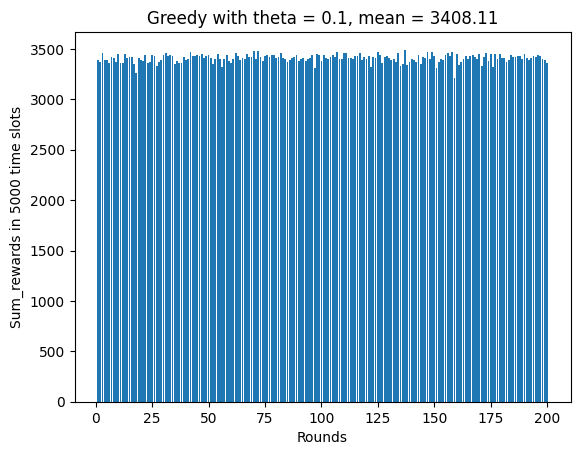

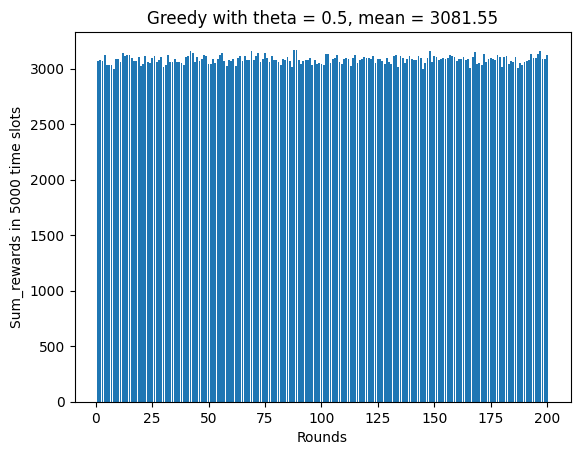

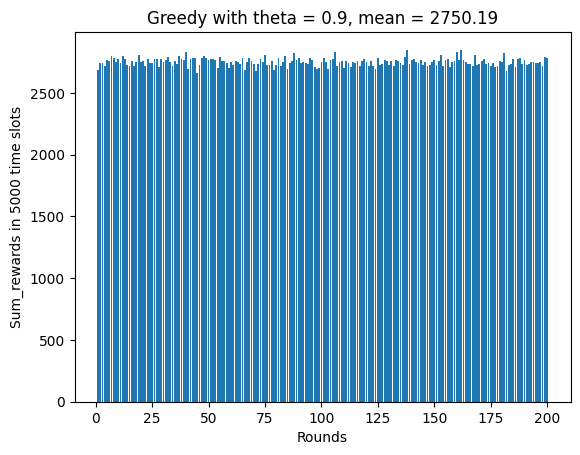

In [6]:
N = 5000 #time slots
M = 200 #run each experient 200 independent trials and take average
theta = [0.7,0.5,0.4]

#return the ind##3#dedfefdddeex (1,2,3) of the max ex_theta
def argmax(ex_theta):
    if ex_theta[0]==ex_theta[1]==ex_theta[2]:
        return random.randint(1,3)
    ans = 0
    for i in range(3):
        if ex_theta[i] > ex_theta[ans]:
            ans = i
    ans += 1
    return ans
#if it has a reward during this selection
def reward(j):
    rand = random.random()
    if rand > theta[j]:
        return 0
    return 1 

def greedy_Bandit(epsilon,av):
    ans = 0
    ex_theta = [0,0,0] 
    cnt = [0,0,0]
    tmp_av = [0]

    I_t = 1 #1, 2, 3
    for t in range(N):
        rand = random.random()
        if rand > epsilon:
            I_t = argmax(ex_theta)
        else:
            I_t = random.randint(3)
        cnt[I_t-1] += 1
        r = reward(I_t-1)
        ex_theta[I_t-1] += (r - ex_theta[I_t-1])/cnt[I_t-1] 
        ans += r
        tmp_av.append((t*tmp_av[t]+r)/(t+1))
    av += tmp_av[1:] 
    
    return ans


#experient begins
reward_1 = []
reward_2 = []
reward_3 = []
#average reward at each time slot
av_reward_1 = np.zeros(5000)
av_reward_2 = np.zeros(5000)
av_reward_3 = np.zeros(5000)

for i in range(M):
    reward_1.append(greedy_Bandit(0.1,av_reward_1))
    reward_2.append(greedy_Bandit(0.5,av_reward_2))
    reward_3.append(greedy_Bandit(0.9,av_reward_3))
reward_1_mean = np.mean(reward_1)
reward_2_mean = np.mean(reward_2)
reward_3_mean = np.mean(reward_3)

#plot
x = np.arange(1,M+1,1)
#theta = 0.1
#plt.subplot(2,2,1)
plt.figure(1)
plt.bar(x,reward_1)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Greedy with theta = 0.1, mean = " + str(reward_1_mean))

#theta = 0.5
#plt.subplot(2,2,2)
plt.figure(2)
plt.bar(x,reward_2)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Greedy with theta = 0.5, mean = " + str(reward_2_mean))

#theta = 0.9
#plt.subplot(2,2,3)
plt.figure(3)
plt.bar(x,reward_3)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Greedy with theta = 0.9, mean = " + str(reward_3_mean))   



Regret Analysis and Aggragate Rewards--Greedy

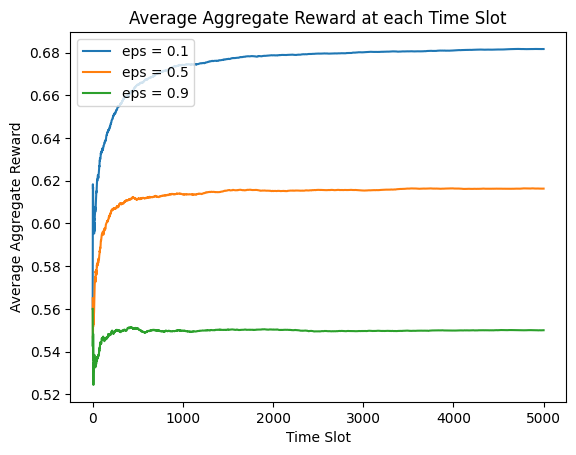

epsilon = 0.1 Mean = 91.89  Var = 1574.9879

epsilon = 0.5 Mean = 418.45  Var = 1194.5475

epsilon = 0.9 Mean = 749.81  Var = 1047.2739



In [7]:
#plot the average reward at each time slot
av1 = np.array(av_reward_1 / M)
av2 = np.array(av_reward_2 / M)
av3 = np.array(av_reward_3 / M)

plt.xlabel("Time Slot")
plt.ylabel("Average Aggregate Reward")
plt.title("Average Aggregate Reward at each Time Slot")
plt.plot(av1, label="eps = 0.1")
plt.plot(av2, label="eps = 0.5")
plt.plot(av3, label="eps = 0.9")
#plt.ylim(0.6, 0.8)
plt.legend()
plt.show()

#regret
regret_1 = np.full(M,3500) - reward_1
print("epsilon = 0.1","Mean = {} ".format(np.mean(regret_1)),"Var = {}\n".format(np.var(regret_1)))
regret_2 = np.full(M,3500) - reward_2
print("epsilon = 0.5","Mean = {} ".format(np.mean(regret_2)),"Var = {}\n".format(np.var(regret_2)))
regret_3 = np.full(M,3500) - reward_3
print("epsilon = 0.9","Mean = {} ".format(np.mean(regret_3)),"Var = {}\n".format(np.var(regret_3)))



**Impact of Epsilon**

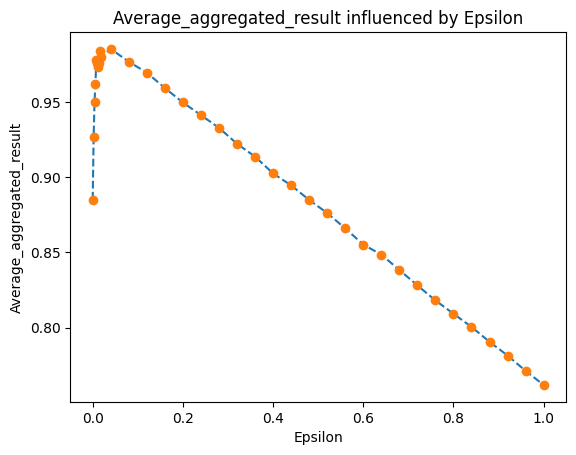

In [8]:
# create a list to deposit the result of each epsilon
Average_aggregated_result=[]
Epsilon = [0.002*k for k in range(10)]
Epsilon1 = [0.04*k for k in range(1,26)]
Epsilon.extend(Epsilon1)
for i in Epsilon:
    reward_i=[]
    av_reward=np.zeros(N)
    for j in range(M):
        reward_i.append(greedy_Bandit(i,av_reward))
    Average_aggregated_result.append(np.mean(reward_i)/3500)
plt.figure(1)
x=Epsilon
y=Average_aggregated_result
plt.xlabel("Epsilon")
plt.ylabel("Average_aggregated_result")
plt.title("Average_aggregated_result influenced by Epsilon")
plt.plot(x,y,'--')
plt.plot(x,y,'o')
plt.show()



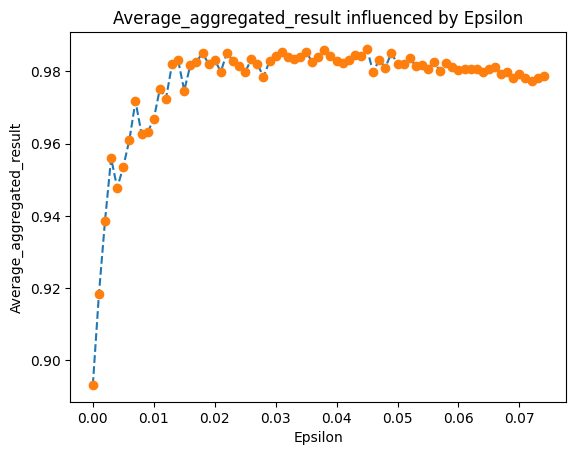

In [9]:
# to get a more accurate optimal epsilon
Average_aggregated_result=[]
Epsilon = [0.001*k for k in range(75)]

for i in Epsilon:
    reward_i=[]
    av_reward=np.zeros(N)
    for j in range(M):
        reward_i.append(greedy_Bandit(i,av_reward))
    Average_aggregated_result.append(np.mean(reward_i)/3500)
plt.figure(1)
x=Epsilon
y=Average_aggregated_result
plt.xlabel("Epsilon")
plt.ylabel("Average_aggregated_result")
plt.title("Average_aggregated_result influenced by Epsilon")
plt.plot(x,y,'--')
plt.plot(x,y,'o')
plt.show()

<font size="3">According to the graph, the maximum average aggregated result( the average of 200 rounds of trials under each epsilon) happens when **Epsilon** -> 0 with **average aggregated result** -> 1 (but **Epsilon** can not choose 0, which will be explained in the next part.)<br> 
Besides, with the increasing of epsilon, the average aggregated result decreases.</font>

**Epsilon changing by time**

Text(0.5, 1.0, 'Greedy with theta = 0.08, mean = 3422.515')

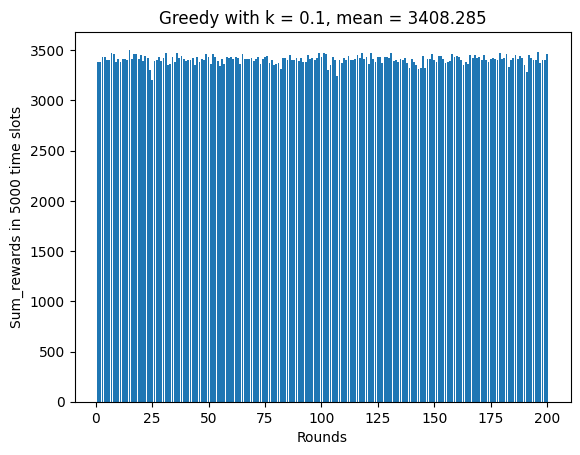

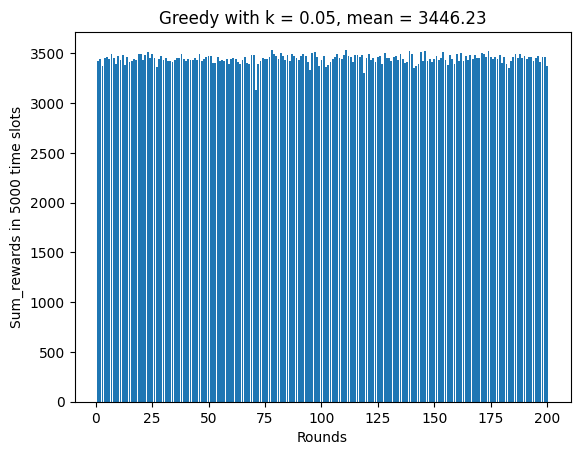

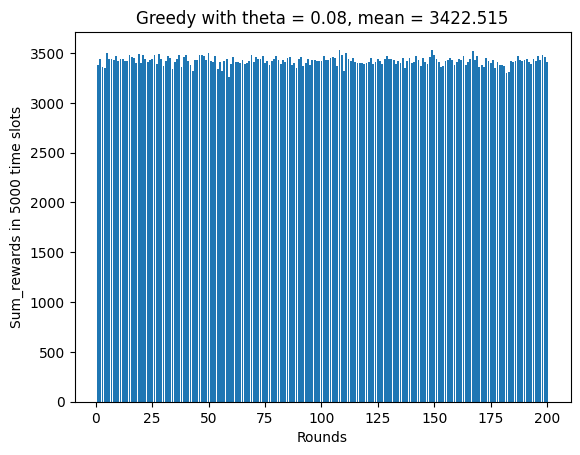

In [10]:
def greedy_t_Bandit(k,av):
    ans = 0
    ex_theta = [0,0,0]
    cnt = [0,0,0]
    tmp_av = [0]

    I_t = 1
    for t in range(N):
        rand = random.random()
        if rand > k*(t**(1/3)):
            I_t = argmax(ex_theta)
        else:
            I_t = random.randint(3)
        cnt[I_t-1] += 1
        r = reward(I_t-1)
        ex_theta[I_t-1] += (r - ex_theta[I_t-1])/cnt[I_t-1] 
        ans += r
        tmp_av.append((t*tmp_av[t]+r)/(t+1))
    av += tmp_av[1:]
    return ans

#experient begins
reward_1 = []
reward_2 = []
reward_3 = []
#average reward at each time slot
av_reward_1 = np.zeros(5000)
av_reward_2 = np.zeros(5000)
av_reward_3 = np.zeros(5000)

for i in range(M):
    reward_1.append(greedy_Bandit(0.1,av_reward_1))
    reward_2.append(greedy_Bandit(0.05,av_reward_2))
    reward_3.append(greedy_Bandit(0.08,av_reward_3))
reward_1_mean = np.mean(reward_1)
reward_2_mean = np.mean(reward_2)
reward_3_mean = np.mean(reward_3)

#plot
x = np.arange(1,M+1,1)

plt.figure(1)
plt.bar(x,reward_1)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Greedy with k = 0.1, mean = " + str(reward_1_mean))


plt.figure(2)
plt.bar(x,reward_2)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Greedy with k = 0.05, mean = " + str(reward_2_mean))


plt.figure(3)
plt.bar(x,reward_3)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Greedy with theta = 0.08, mean = " + str(reward_3_mean))  


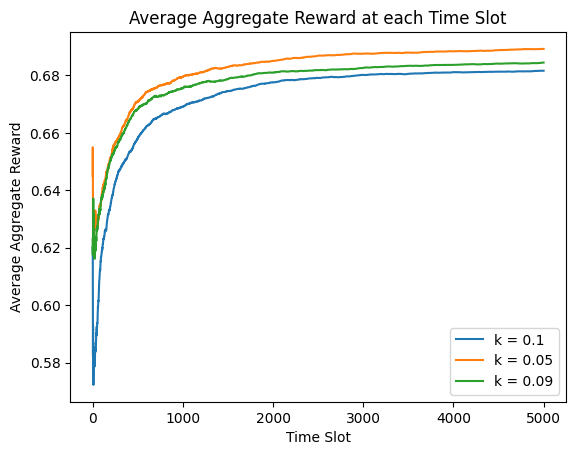

k = 0.1 Mean = 91.715  Var = 1708.353775

k = 0.05 Mean = 53.77  Var = 1999.0171000000003

k = 0.08 Mean = 77.485  Var = 1759.0397750000002



In [11]:
#plot the average reward at each time slot
av1 = np.array(av_reward_1 / M)
av2 = np.array(av_reward_2 / M)
av3 = np.array(av_reward_3 / M)

plt.xlabel("Time Slot")
plt.ylabel("Average Aggregate Reward")
plt.title("Average Aggregate Reward at each Time Slot")
plt.plot(av1, label="k = 0.1")
plt.plot(av2, label="k = 0.05")
plt.plot(av3, label="k = 0.09")
#plt.ylim(0.6, 0.8)
plt.legend()
plt.show()

#regret
regret_1 = np.full(M,3500) - reward_1
print("k = 0.1","Mean = {} ".format(np.mean(regret_1)),"Var = {}\n".format(np.var(regret_1)))
regret_2 = np.full(M,3500) - reward_2
print("k = 0.05","Mean = {} ".format(np.mean(regret_2)),"Var = {}\n".format(np.var(regret_2)))
regret_3 = np.full(M,3500) - reward_3
print("k = 0.08","Mean = {} ".format(np.mean(regret_3)),"Var = {}\n".format(np.var(regret_3)))


We let epsilon to be $k \cdot t^{\frac{1}{3}}$, where k is a positive real number, which means epsilon increases with t. This kind of greedy algorithm allows Exploration part to be more at the beginning and the Exploitation part to be more as the experienment is continuing.
Comparing the results with the greedy algorithm that has a fixed epsilon, it has a better mean and less regret, so it can lead to a better result by finding the proper k. 

**Understanding of Greedy Algorithm:** 

<font size="3">

- **Epsilon**  acts as the probability of exploration and exploration. <br>
- The greater the **Epsilon** is, the greater the probability of each exploration is. That is, one of the three bandits will be randomly selected to get a reward.<br> 
- The smaller the **Epsilon**  is, the greater the probability of each exit. That is, the one with the highest probability of obtaining rewards will be selected from the probability of obtaining rewards for each updated bandit. <br>
- The algorithm updates theta by using the number of times bandit is selected, so that the bandit with the largest theta is selected for the next exploration.</font>

<font size="4">**Tradeoff of Greedy** </font>

<font size="3">

- Intuitively, as time goes by, the probability information that we can obtain about the reward obtained by each bandit is gradually increasing.<br>

- Therefore, if **Epsilon** is small at this time, we can select a better bandit according to known experience, and we should be able to obtain more rewards. <br>
- However, if **Epsilon** is relatively large at this time, although we have known the information about the three bandits, we do not make full use of them, and more of them are selected at random. In this way, even if the bandit with high probability is selected at random for some times, it will still be selected at random to the bandit with low probability, and the discrimination of the three bandit will become smaller, so we can not distinguish the best bandit from the middle, Then the probability of each reward is not optimal, and naturally we cannot get the optimal solution.<br>
- For example, if **Epsilon**=1, then the process includes all the exloration without one exploitation, it is sure that the random case can not find the optimal result.

- Therefore, when **Epsilon** is small, we are more likely to get the optimal solution. That is, when E ->0, we are more likely to get the optimal solution. <br>
- But **Epsilon** cannot be 0, because this will cause an error. Since it will select the largest theta of the three bandits from the first time, but the initialization of theta is 0, it will not select any bandit.<br>

- At the same time, with the increase of time slots, the ratio of average aggregated result to oracle value tends to be stable.</font>

- **Conclusion:**<br>
<font size="3">
1.**Exploration:** We need to explore when there is less information and sometimes when there is less time slots, the optimal bandit is not found, so we need to explore too.<br> 
2.**Exploitation:** The exploitation seems to be good, because we select the current optimal bandit every time, but it is possible that the real optimal bandit has not been found, so if we select the local optimal solution every time, we may lose the opportunity to find the real optimal solution.<br>
3.**Tradeoff:** That is, how to find the truly optimal bandit eventually when we try to exploit the local optimal bandit every time without trapping in it.</font> 


# UCB

**Implementation**

Text(0.5, 1.0, 'UCB with c=10 with mean= 2825.22')

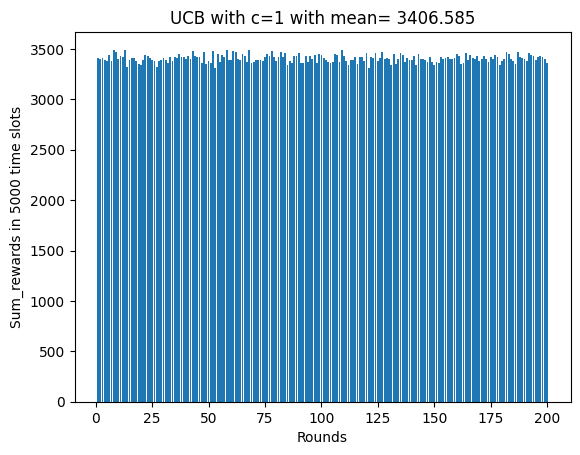

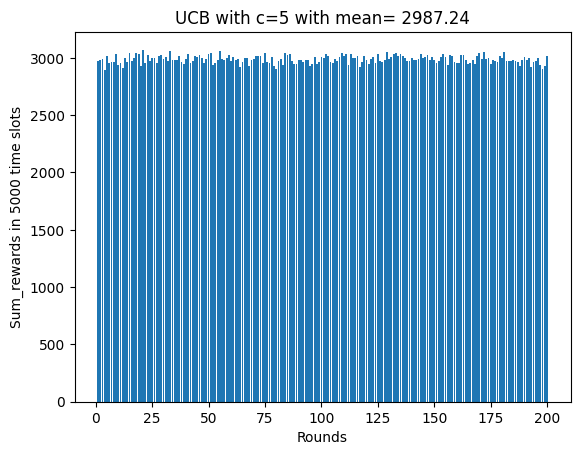

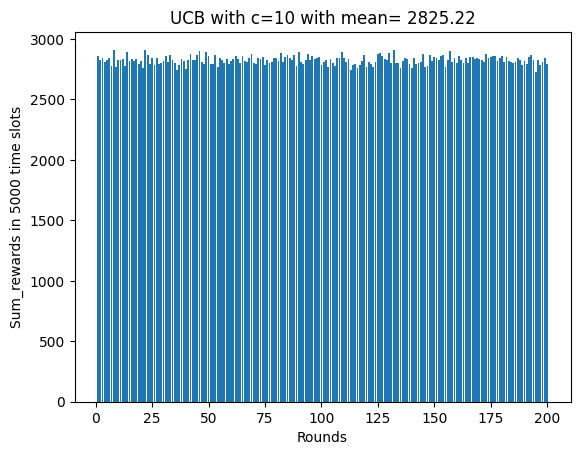

In [12]:
N=5000
C=[1,5,10]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta_1=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward

def UCB(sum_reward,c,av):
    tmp_av = [0]
    for t in range(0,3): #initialization
        arm=t
        reward=np.random.binomial(1,prob[arm]) 
        count[arm]=1
        sum_reward+=reward
        theta_1[arm]=reward
        tmp_av.append((t*tmp_av[t]+reward)/(t+1))

    for t in range(3,N):
        max_val=0
        arm=-1
        for j in range(0,3):
            if theta_1[j]+c*math.sqrt(2*math.log(t)/count[j])>max_val:
                max_val=theta_1[j]+c*math.sqrt(2*math.log(t)/count[j]) 
                arm=j
        count[arm]+=1 
        reward=np.random.binomial(1,prob[arm])  
        sum_reward+=reward
        theta_1[arm]+=(1/count[arm])*(reward-theta_1[arm])  
        tmp_av.append((t*tmp_av[t]+reward)/(t+1))

    av += tmp_av[1:]
    return sum_reward

sum_1=[]
sum_2=[]
sum_3=[]

av_reward_1 = np.zeros(5000)
av_reward_2 = np.zeros(5000)
av_reward_3 = np.zeros(5000)

x=[]
for k in range(200):
    sum_1.append(UCB(sum_reward,C[0],av_reward_1))
    sum_2.append(UCB(sum_reward,C[1],av_reward_2))
    sum_3.append(UCB(sum_reward,C[2],av_reward_3))
    x.append(k+1)
plt.figure(1)
plt.bar(x,sum_1)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("UCB with c=1 with mean= "+str(np.mean(sum_1)))

plt.figure(2)
plt.bar(x,sum_2)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("UCB with c=5 with mean= "+str(np.mean(sum_2)))

plt.figure(3)
plt.bar(x,sum_3)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("UCB with c=10 with mean= "+str(np.mean(sum_3)))


Regret Analysis and Aggragate Rewards

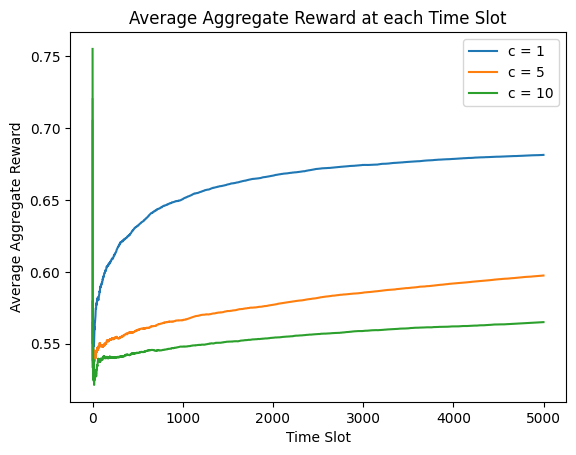

c = 1 Mean = 93.415  Var = 1433.662775

c = 5 Mean = 512.76  Var = 1186.7324

c = 10 Mean = 674.78  Var = 1242.7715999999998



In [13]:
#plot the average reward at each time slot
av1 = np.array(av_reward_1 / M)
av2 = np.array(av_reward_2 / M)
av3 = np.array(av_reward_3 / M)

plt.xlabel("Time Slot")
plt.ylabel("Average Aggregate Reward")
plt.title("Average Aggregate Reward at each Time Slot")
plt.plot(av1, label="c = 1")
plt.plot(av2, label="c = 5")
plt.plot(av3, label="c = 10")
#plt.ylim(0.6, 0.8)
plt.legend()
plt.show()

#regret
regret_1 = np.full(M,3500) - sum_1
print("c = 1","Mean = {} ".format(np.mean(regret_1)),"Var = {}\n".format(np.var(regret_1)))
regret_2 = np.full(M,3500) - sum_2
print("c = 5","Mean = {} ".format(np.mean(regret_2)),"Var = {}\n".format(np.var(regret_2)))
regret_3 = np.full(M,3500) - sum_3
print("c = 10","Mean = {} ".format(np.mean(regret_3)),"Var = {}\n".format(np.var(regret_3)))




Impacts of c

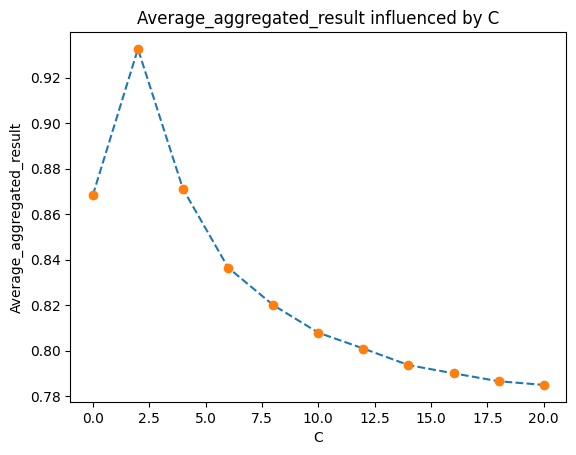

In [14]:
# create a list to deposit the result of each epsilon
Average_aggregated_result_c=[]
C_1=[2*k for k in range(11)]
for i in C_1:
    reward_c=[]
    av_reward_c=np.zeros(N)
    sum_reward_c=0
    for j in range(M):
        reward_c.append(UCB(sum_reward_c,i,av_reward_c))
    Average_aggregated_result_c.append(np.mean(reward_c)/3500)
plt.figure(1)
x=C_1
y=Average_aggregated_result_c
plt.xlabel("C")
plt.ylabel("Average_aggregated_result")
plt.title("Average_aggregated_result influenced by C")
plt.plot(x,y,'--')
plt.plot(x,y,'o')
plt.show()

<font size="3">According to the graph, the average aggregated result peaks at around c=2.5.<br>
Besides, the average aggregated result first increases with the increasing of c between approximately 0~2.5 and than decreases with the increasing of c after approximately 2.5.   </font>

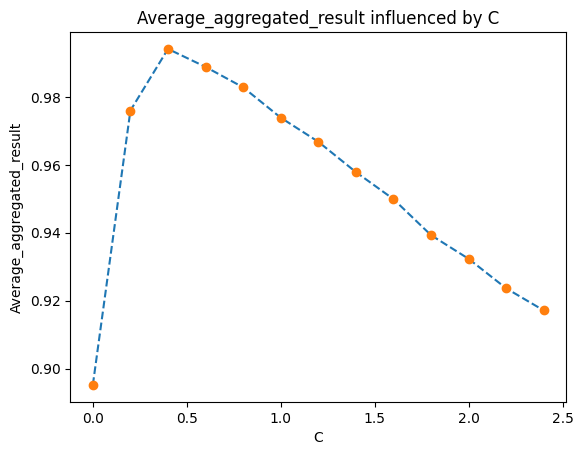

In [15]:
# create a list to deposit the result of each epsilon
Average_aggregated_result_c=[]
C_1=[0.2*k for k in range(13)]
for i in C_1:
    reward_c=[]
    av_reward_c=np.zeros(N)
    sum_reward_c=0
    for j in range(M):
        reward_c.append(UCB(sum_reward_c,i,av_reward_c))
    Average_aggregated_result_c.append(np.mean(reward_c)/3500)
plt.figure(1)
x=C_1
y=Average_aggregated_result_c
plt.xlabel("C")
plt.ylabel("Average_aggregated_result")
plt.title("Average_aggregated_result influenced by C")
plt.plot(x,y,'--')
plt.plot(x,y,'o')
plt.show()

<font size="3">As we further reduce the period of c to 0~2.5, we find that c=2.5 is not the peak, while the peak happens between 0~1.<br>
Besides, the average aggregated result first increases with the increasing of c between 0~0.5, and then decreases with the increasing of c after that.</font>

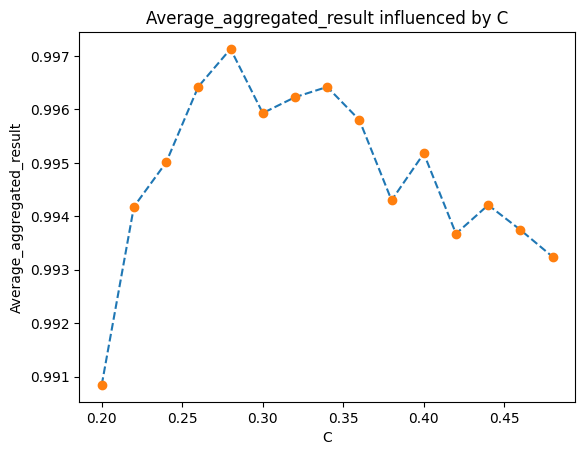

In [16]:
# create a list to deposit the result of each epsilon
Average_aggregated_result_c=[]
C_1=[0.02*k for k in range(10,25)]
for i in C_1:
    reward_c=[]
    av_reward_c=np.zeros(N)
    sum_reward_c=0
    for j in range(M):
        reward_c.append(UCB(sum_reward_c,i,av_reward_c))
    Average_aggregated_result_c.append(np.mean(reward_c)/3500)
plt.figure(1)
x=C_1
y=Average_aggregated_result_c
plt.xlabel("C")
plt.ylabel("Average_aggregated_result")
plt.title("Average_aggregated_result influenced by C")
plt.plot(x,y,'--')
plt.plot(x,y,'o')
plt.show()

<font size="3">As we further reduce the period of c to 0.2~0.5, we see that there is a peak around c=0.3.</font>

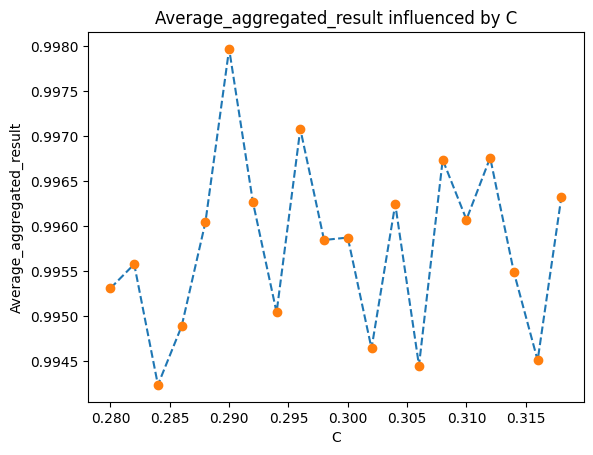

In [17]:
# create a list to deposit the result of each epsilon
Average_aggregated_result_c=[]
C_1=[0.002*k for k in range(140,160)]
for i in C_1:
    reward_c=[]
    av_reward_c=np.zeros(N)
    sum_reward_c=0
    for j in range(M):
        reward_c.append(UCB(sum_reward_c,i,av_reward_c))
    Average_aggregated_result_c.append(np.mean(reward_c)/3500)
plt.figure(1)
x=C_1
y=Average_aggregated_result_c
plt.xlabel("C")
plt.ylabel("Average_aggregated_result")
plt.title("Average_aggregated_result influenced by C")
plt.plot(x,y,'--')
plt.plot(x,y,'o')
plt.show()

<font size="3">As the period of c reduces to 0.280~0.320, we have found a peak around 0.300~0.305</font>

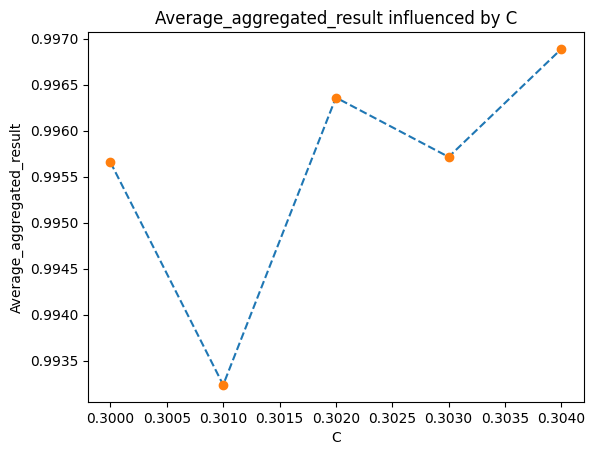

In [18]:
# create a list to deposit the result of each epsilon
Average_aggregated_result_c=[]
C_1=[0.001*k for k in range(300,305)]
for i in C_1:
    reward_c=[]
    av_reward_c=np.zeros(N)
    sum_reward_c=0
    for j in range(M):
        reward_c.append(UCB(sum_reward_c,i,av_reward_c))
    Average_aggregated_result_c.append(np.mean(reward_c)/3500)
plt.figure(1)
x=C_1
y=Average_aggregated_result_c
plt.xlabel("C")
plt.ylabel("Average_aggregated_result")
plt.title("Average_aggregated_result influenced by C")
plt.plot(x,y,'--')
plt.plot(x,y,'o')
plt.show()

<font size="3">Now, we can reach the conclusion that the opitimal average aggregated result happens when c=3.011 with the ratio of true sum to the oracle sum = 0.9964</font>

<font size="3">$I(t) \leftarrow \underset{j \in\{1,2,3\}}{\arg \max }\left(\widehat{\theta}(j)+c \cdot \sqrt{\frac{2 \log (t)}{\operatorname{count}(j)}}\right)$<br>
According to the formula, let's discuss the reason of impacts of confidence value.<br>

- We see from the previous discuss, the average aggregated result peaks at $c_0$
- When c<$c_0$, with the increase of c, the average aggregated result increases. Why? That's because when c is small enough, c underestimates the confidence interval of the arm, so the local optimal arm will not be chosen as much as it can. Therefore, the result is not the optimal.<br>
- when c>$c_0$, with the increase of c, the average aggregated result decreases. Why? That's because if c is too large, c overestimates the confidence interval of the arm and the periodical characteristics will vanish. So, it will reduce to **Greedy Algorithm**, which may choose the local optimal arm over and over again, so it may miss the true optimal arm. Therefore, it can not be optimal. And with the c grows larger and larger, this phenomenon will become more obvious.<br>

(**periodical characteristics**: with the increase of time slots,$log(t)$ will become larger, which will neutralize the impact of **count(j)** as **count(j)** grows larger.)</font>

**Understanding of UCB Algorithm**

<font size="3">

- Upper Confidence Bound algorithms construct a confidence interval of what each arm’s true performance might be, where **c** is the confidence value. The algorithms then optimistically assume that each arm will perform as well as its upper confidence bound, selecting the arm with the highest UCB.<br>
</font>



<font size="4">**Tradeoff in UCB**</font>

<font size="3">According to the formula,<br>

$I(t) \leftarrow \underset{j \in\{1,2,3\}}{\arg \max }\left(\widehat{\theta}(j)+c \cdot \sqrt{\frac{2 \log (t)}{\operatorname{count}(j)}}\right)$<br>we can see that with the increasing of an arm to be chosen, count(j) increases, so the confidence interval of this arm decreases. Therefore, there will be probability that the bandit will choose other arms with larger confidence interval.<br>
Besides, with the increasing of time slots, the confidence interval of this arm will become large again, so this arm can be chosen again, which is a periodical process. </font>


<font size="4">

- **Conclusion**</font><br>
<font size="3">
1. **Exploration:** Each time we will explore the arm with largest confidence interval. <br>
2. **Exploitation:**  After the algorithm exploits the arm with the highest UCB for many times, since the confidence intervals of this arm shrinks, the algorithm will then pick arms with high average performance. That is, it will periodically give less-explored arms a chance since their confidence intervals are wider. So that's why **UCB** performs better than **Greedy**,which could be trapped in the local optimal result and always exploit. <br>
3. **Tradeoff:** The same as what has been said in **Exploitation**, which indicates that the true optimal choice will have more probability to be selected in **UCB** than **Greedy**. So,**UCB** has a better performance than **Greedy**. </font>


# Thompson Sampling

Implementation

Text(0.5, 1.0, '{(alpha_1,beta_1)=(601,401),(alpha_2,beta_2)=(401,601),(alpha_3,beta_3)=(2,3)} with mean= 3501.14')

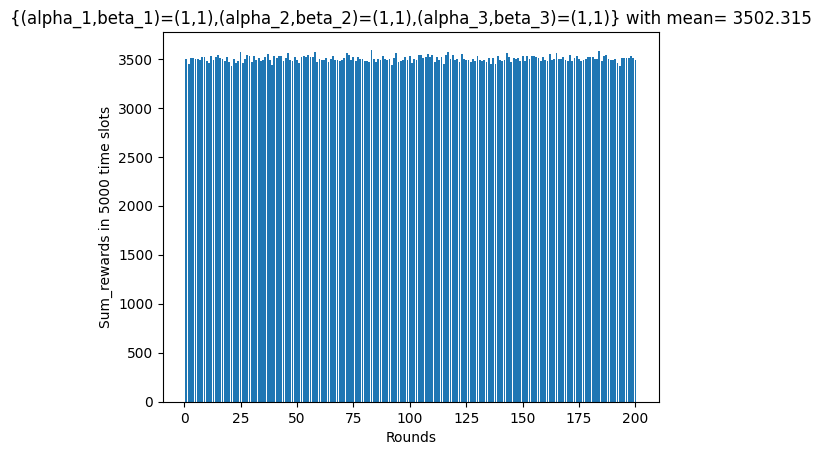

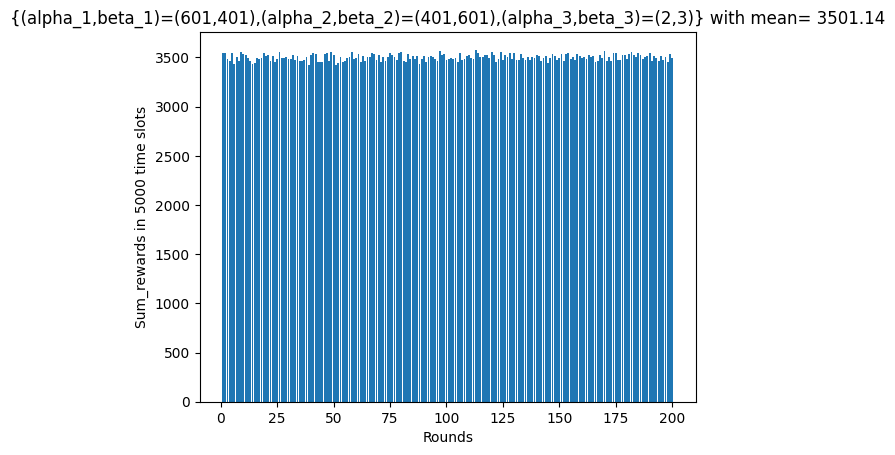

In [38]:
N=5000
Beta=[[[1,1],[1,1],[1,1]],[[601,401],[401,601],[2,3]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]
def Thompson(sum_reward,k,av):
    tmp_av = [0]
    for t in range(0,N):
        for j in range(0,3):
            theta[j]=np.random.beta(Beta[k][j][0],Beta[k][j][1]) 
        max_val=0
        for j in range(0,3):
            if theta[j]>max_val:
                max_val=theta[j]
                arm=j
        reward=np.random.binomial(1,prob[arm])
        sum_reward+=reward
    
        tmp_av.append((t*tmp_av[t]+reward)/(t+1))

        Beta[k][arm][0]+=prob[arm]  
        Beta[k][arm][1]+=1-prob[arm]

    av += tmp_av[1:]
    return sum_reward

sum_1=[]
sum_2=[]

#average reward at each time slot
av_reward_1 = np.zeros(5000)
av_reward_2 = np.zeros(5000)

x=[]
for k in range(200):
    sum_1.append(Thompson(sum_reward,0,av_reward_1))
    sum_2.append(Thompson(sum_reward,1,av_reward_2))
    x.append(k+1)

plt.figure(1)
plt.bar(x,sum_1)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("{(alpha_1,beta_1)=(1,1),(alpha_2,beta_2)=(1,1),(alpha_3,beta_3)=(1,1)} with mean= "+str(np.mean(sum_1)))

plt.figure(2)
plt.bar(x,sum_2)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("{(alpha_1,beta_1)=(601,401),(alpha_2,beta_2)=(401,601),(alpha_3,beta_3)=(2,3)} with mean= "+str(np.mean(sum_2)))

Regret Analysis and Aggragate Rewards

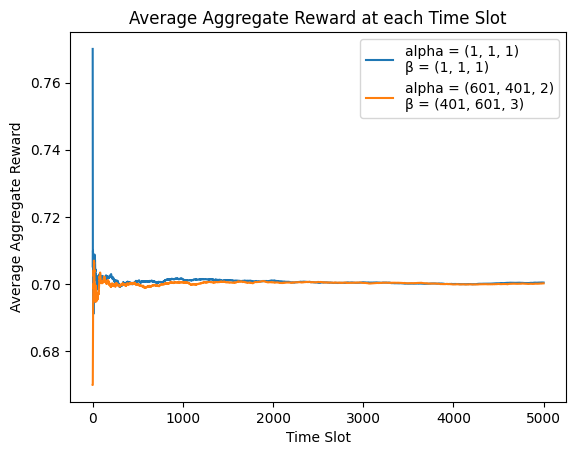

alpha = (1, 1, 1) beta = (1, 1, 1) Mean = -2.315  Var = 836.025775

alpha = (601, 401, 2) beta = (401, 601, 3) Mean = -1.14  Var = 1081.1904000000002



In [39]:
#plot the average reward at each time slot
av1 = np.array(av_reward_1 / M)
av2 = np.array(av_reward_2 / M)

plt.xlabel("Time Slot")
plt.ylabel("Average Aggregate Reward")
plt.title("Average Aggregate Reward at each Time Slot")
plt.plot(av1, label="alpha = (1, 1, 1)\nβ = (1, 1, 1)")
plt.plot(av2, label="alpha = (601, 401, 2)\nβ = (401, 601, 3)")
#plt.ylim(0.6, 0.8)
plt.legend()
plt.show()

#regret
regret_1 = np.full(M,3500) - sum_1
print("alpha = (1, 1, 1) beta = (1, 1, 1)","Mean = {} ".format(np.mean(regret_1)),"Var = {}\n".format(np.var(regret_1)))
regret_2 = np.full(M,3500) - sum_2
print("alpha = (601, 401, 2) beta = (401, 601, 3)","Mean = {} ".format(np.mean(regret_2)),"Var = {}\n".format(np.var(regret_2)))



Impacts of alpha, beta

In [21]:
#draw the PDF of Beta over 5000 trials
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)
def Thompson_PDF(sum_reward,k,Beta): 
    tmp_av = [0]
    cnt=0
    plt.figure(figsize=(15,15))
    for t in range(0,N):
        for j in range(0,3):  
            theta[j]=np.random.beta(Beta[k][j][0],Beta[k][j][1]) 
        max_val=0
        for j in range(0,3):
            if theta[j]>max_val:
                max_val=theta[j]
                arm=j
        
        reward=np.random.binomial(1,prob[arm])
        sum_reward+=reward
    
        #tmp_av.append((t*tmp_av[t]+reward)/(t+1))

        Beta[k][arm][0]+=prob[arm]
        Beta[k][arm][1]+=1-prob[arm]
        if(t==9 or t==99 or t==299 or t==499 or t==999 or t==1999 or t==2999 or t==3999 or t==4999):
            ab_value=[[Beta[k][0][0],Beta[k][0][1]],[Beta[k][1][0],Beta[k][1][1]],[Beta[k][2][0],Beta[k][2][1]]]
            x =x = np.linspace(0.0, 1.0, 200)
            cnt+=1
            plt.subplot(3,3,cnt)
            for ab in ab_value:
                dist = beta(ab[0], ab[1])
                dist_y = dist.pdf(x)
                plt.plot(x, dist_y, label=r'$\alpha=%.1f,\ \beta=%.1f$' % (ab[0], ab[1]))

            plot.title(u'PDF of Beta: Trials = '+str(t+1), fontproperties=font)
            plot.xlim(0, 1)
            #plot.ylim(0, 2.5)
            plot.legend()
    plot.show()

        

    #av += tmp_av[1:]
    return sum_reward

**Eg1: PDF of （α1,β1）=(1,1) (α2,β2)=(1,1) (α3,β3)=(1,1)**

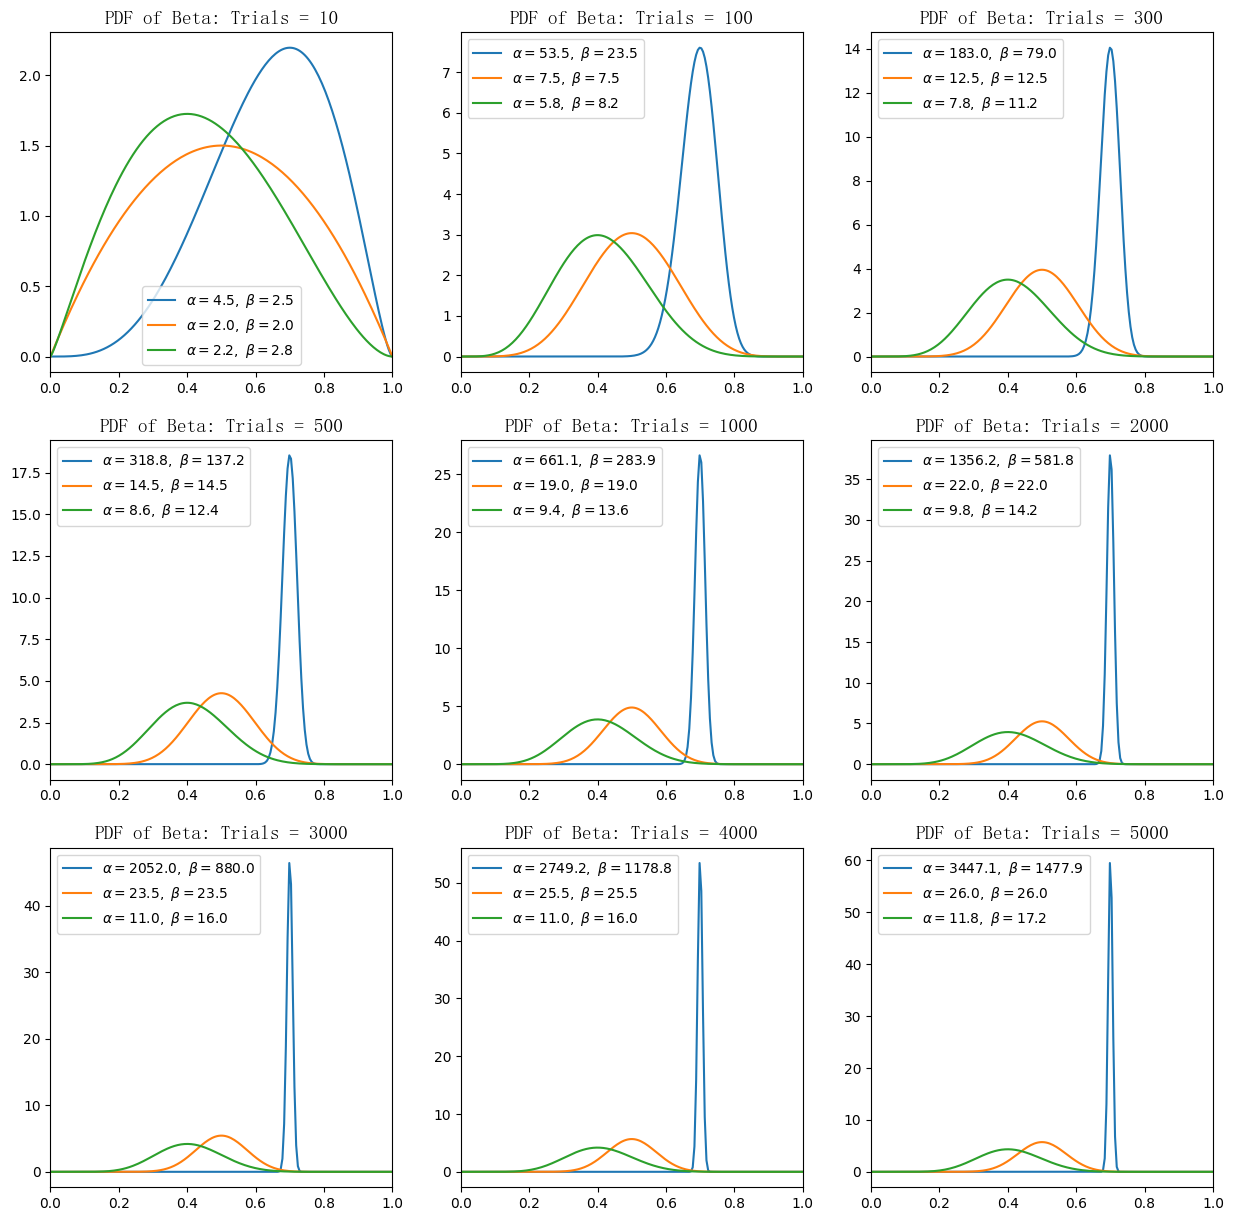

3465

In [22]:
N=5000
Beta=[[[1,1],[1,1],[1,1]],[[601,401],[401,601],[2,3]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF
Thompson_PDF(sum_reward,0,Beta)

**Eg2:（α1,β1）=(10,10) (α2,β2)=(10,10) (α3,β3)=(10,10)**

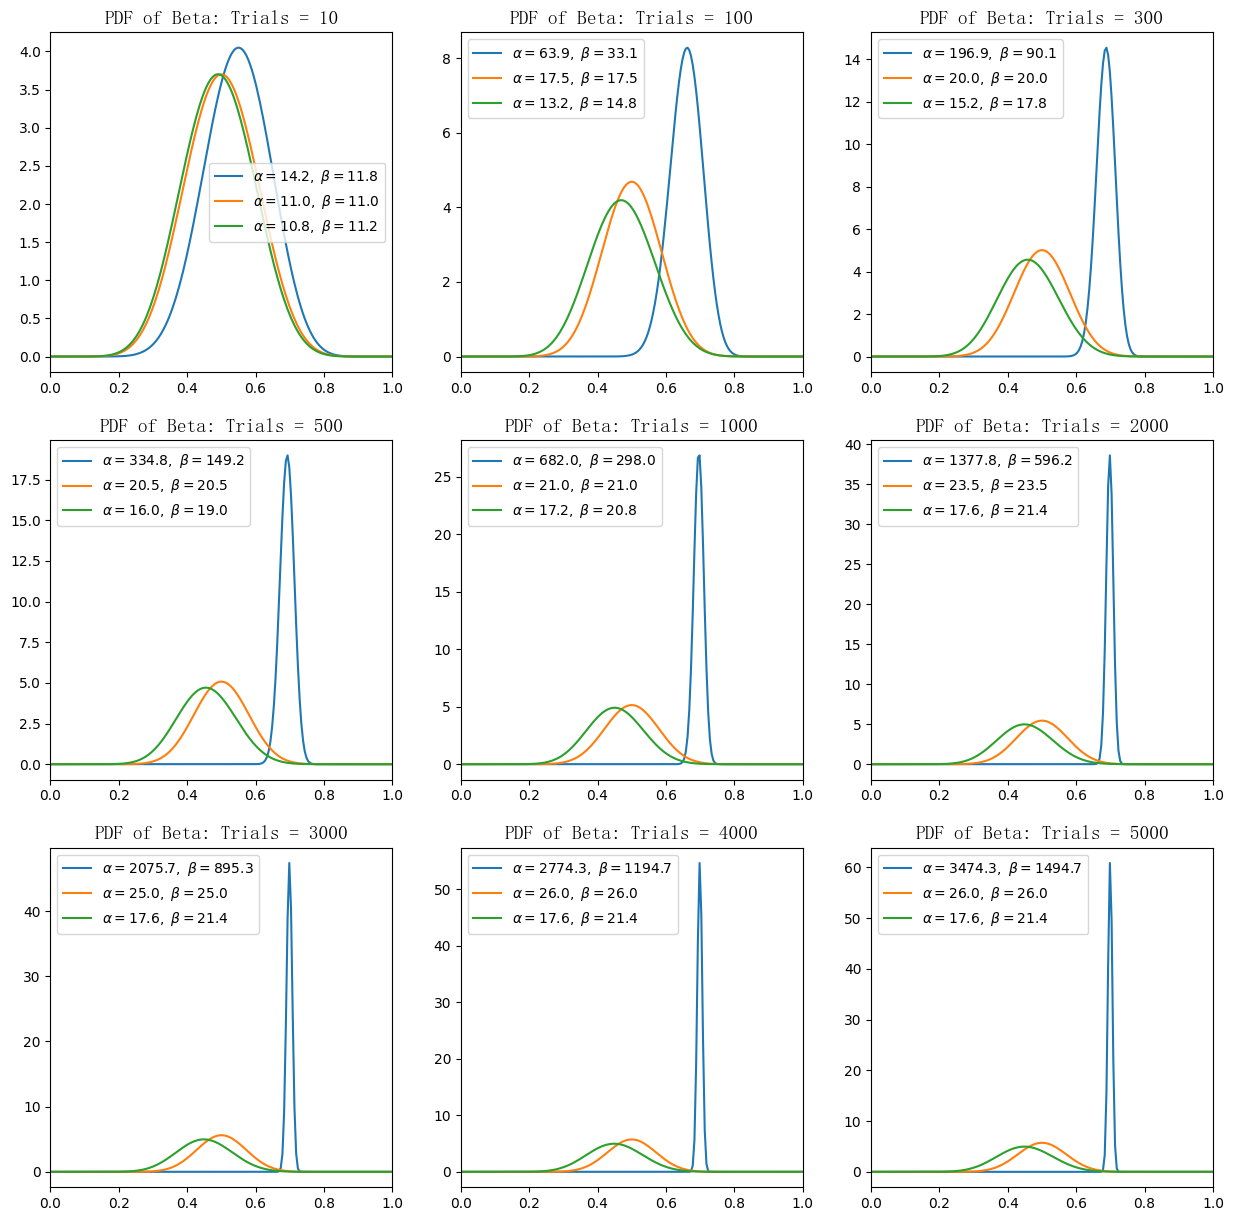

3438

In [23]:
N=5000
Beta_1=[[[10,10],[10,10],[10,10]],[[601,401],[401,601],[2,3]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF
Thompson_PDF(sum_reward,0,Beta_1)

<font size="3">

- It can be seen from the above two results that when the initial beta distribution is the same, the true optimal arm can always be found.<br>
- And the true optimal arm always has the maximum probability to be chosen.</font>

**Eg3:PDF of（α1,β1）=(601,401) (α2,β2)=(401,601) (α3,β3)=(2,3)**

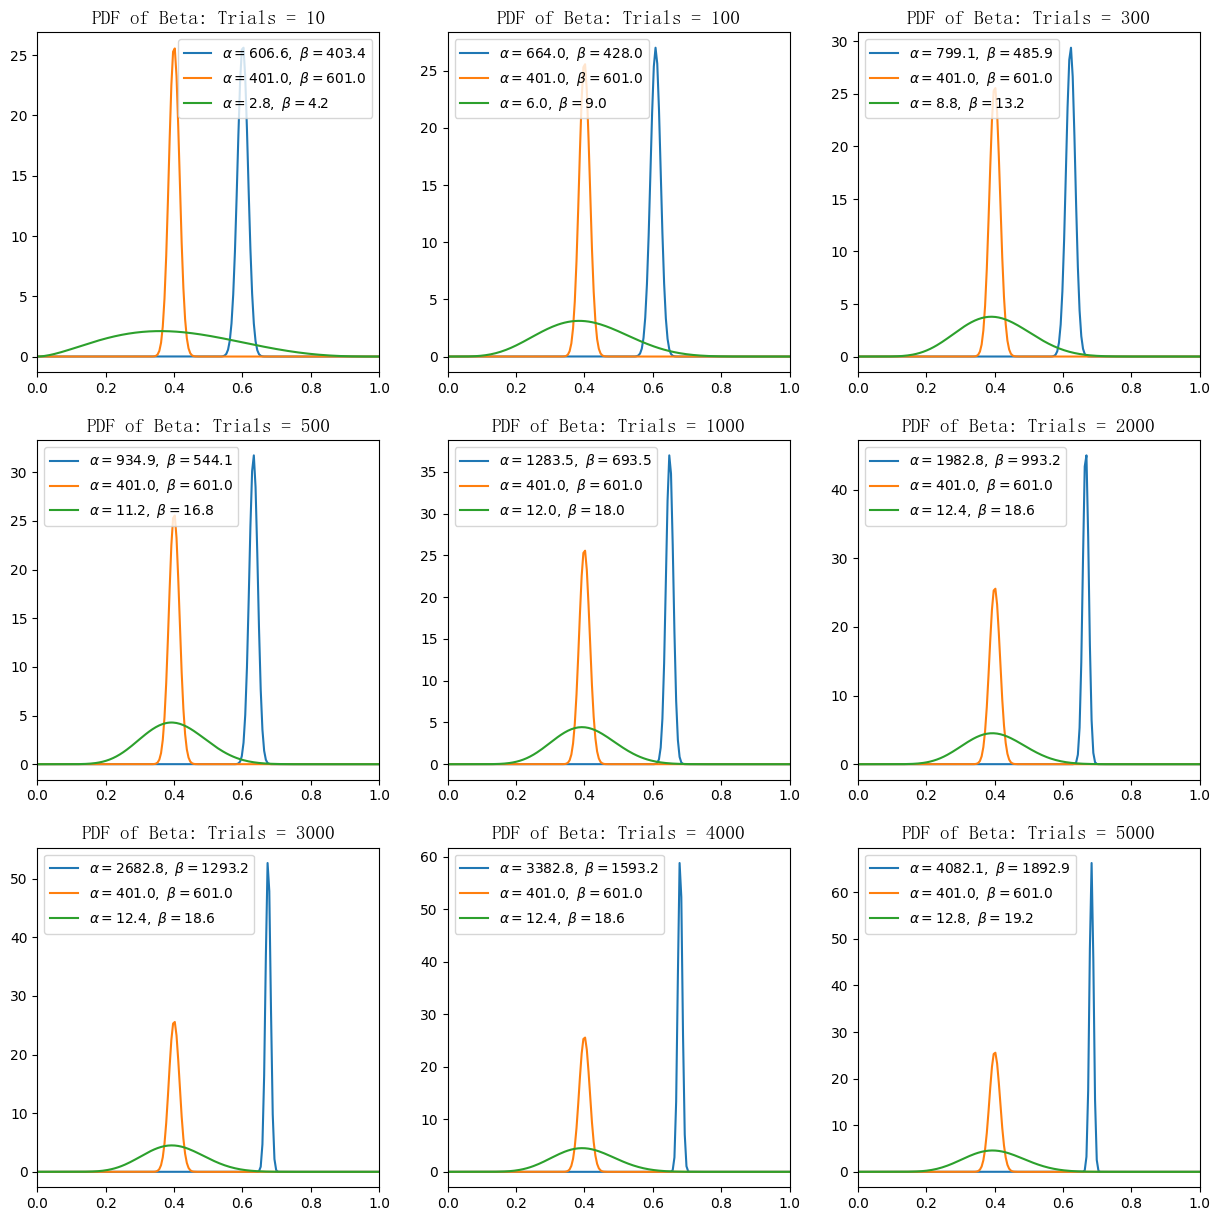

3438

In [24]:
N=5000
Beta=[[[1,1],[1,1],[1,1]],[[601,401],[401,601],[2,3]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF
Thompson_PDF(sum_reward,1,Beta)

**Eg4:PDF of（α1,β1）=(401,601) (α2,β2)=(601,401) (α3,β3)=(2,3)**

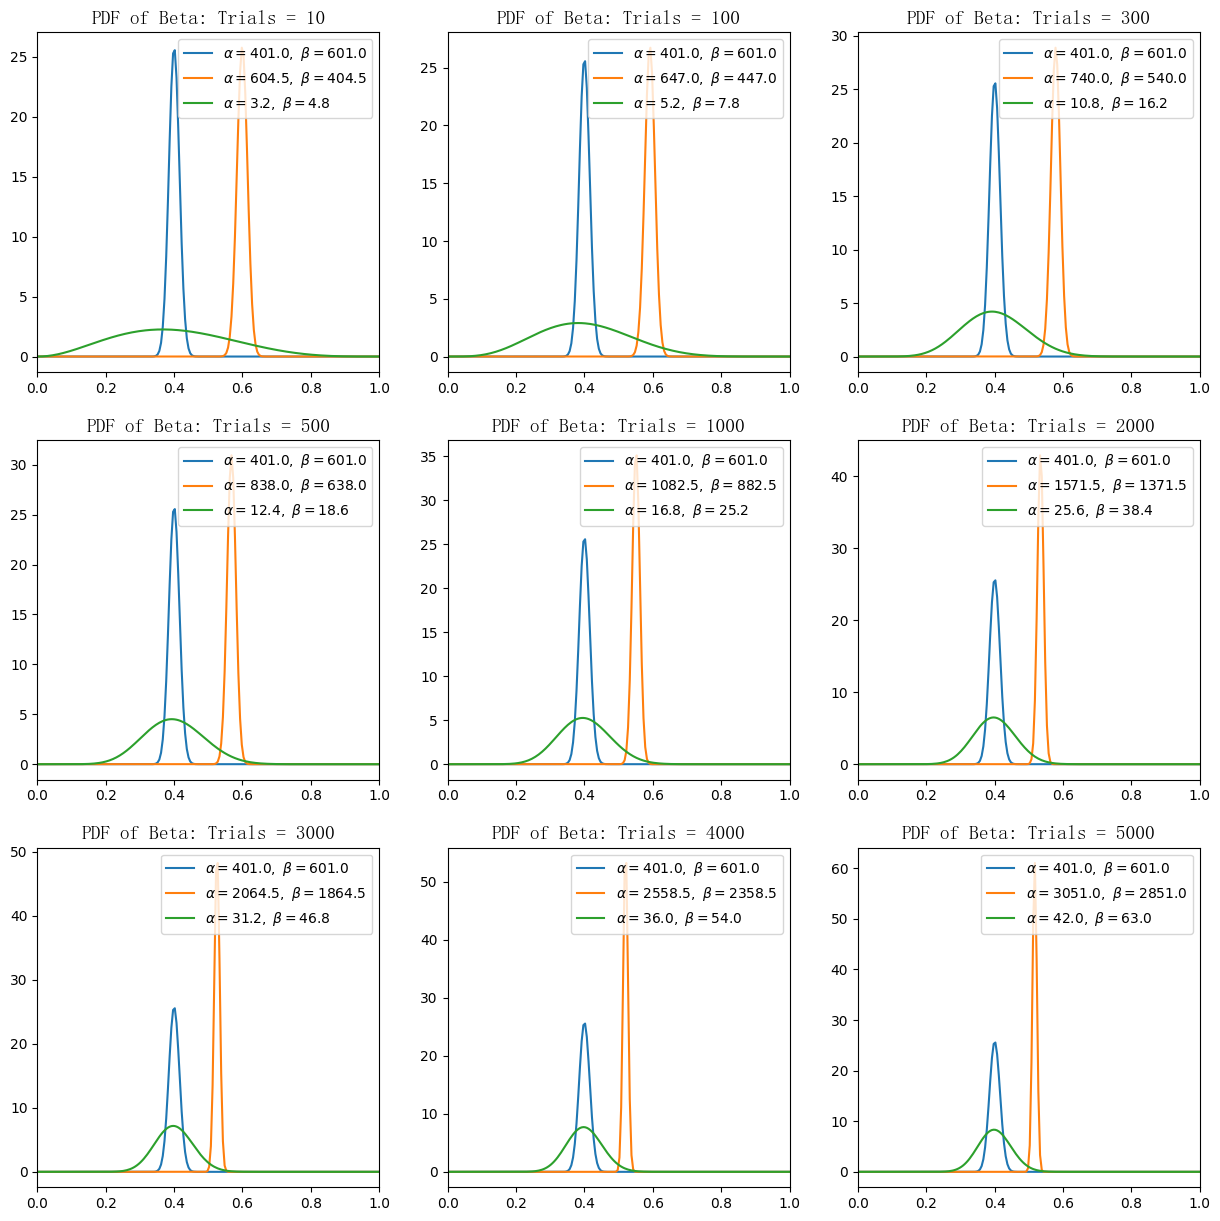

2441

In [25]:
N=5000
Beta_1=[[[401,601],[601,401],[2,3]],[[100,10],[200,10],[300,10]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF 
Thompson_PDF(sum_reward,0,Beta_1)

**Eg5:PDF of（α1,β1）=(401,601) (α2,β2)=(601,401) (α3,β3)=(3,2)**

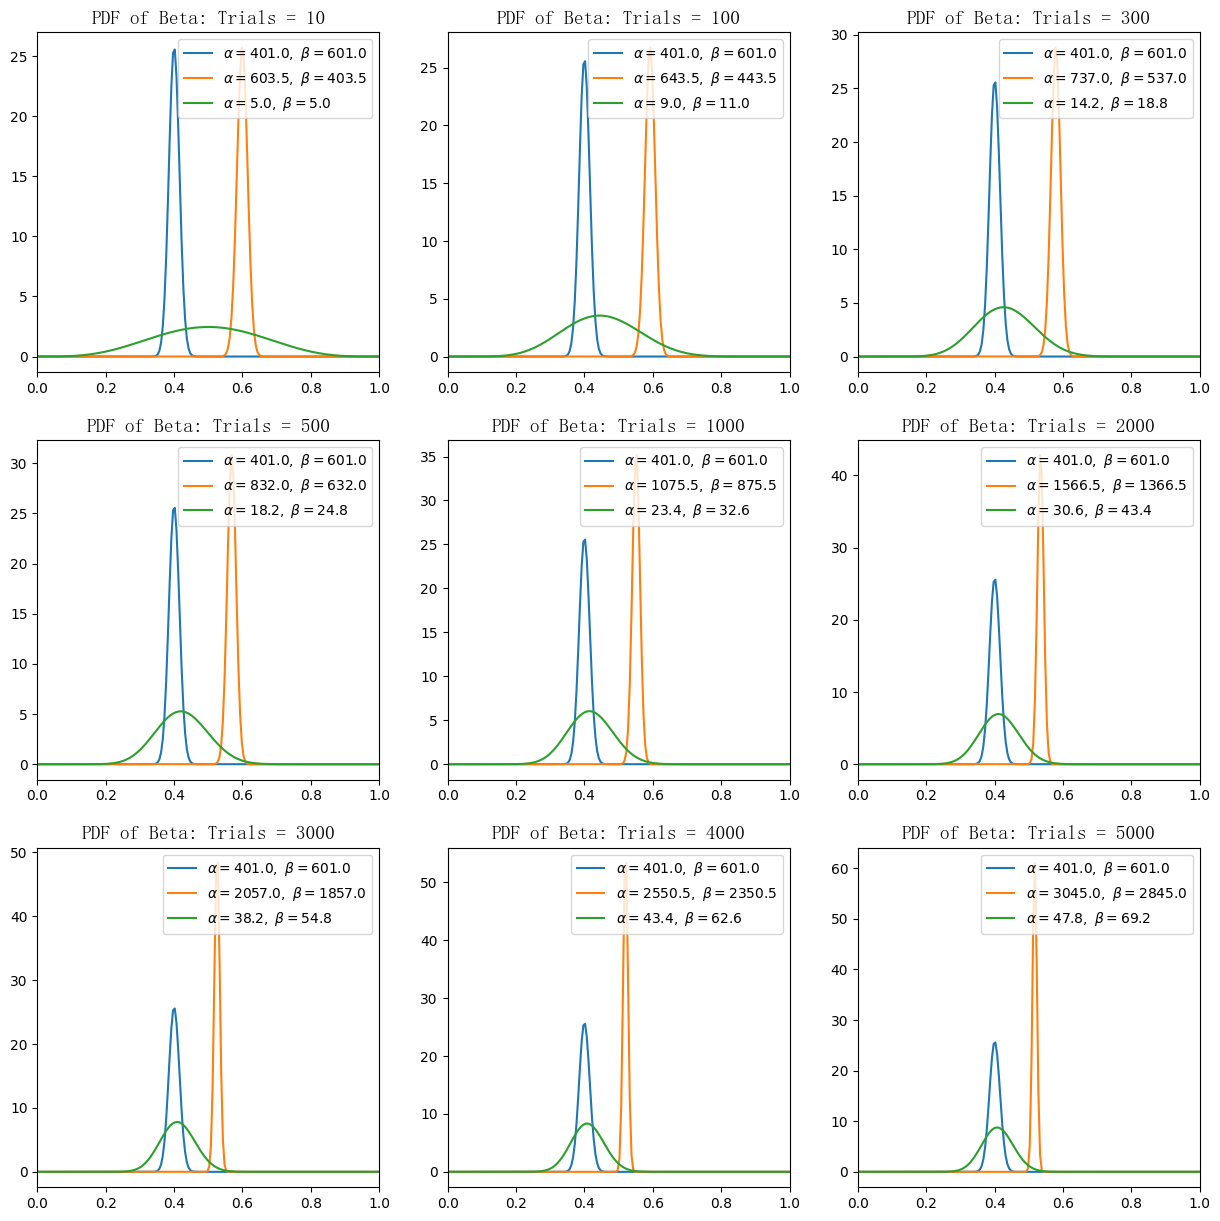

2478

In [26]:
N=5000
Beta_1=[[[401,601],[601,401],[3,2]],[[100,10],[200,10],[300,10]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

Thompson_PDF(sum_reward,0,Beta_1)

<font size="3">

- It can be seen that if the initial beta distribution expectation of one of the three arms is large and the other two are small, the arm with the larger initial expectation is the most likely to be selected multiple times, and the probability that this arm can be selected will be far greater than the other two arms over time. <br>
- However, there is a problem of order. 
- At the beginning, we did not know the oracle probability of the arm, so the expectation of which arm's beta distribution is large will affect the optimality of the final result. For example, Eg4 does not maximize the probability that true optimal arm is selected. 
- Therefore, such parameter distribution cannot guarantee the optimal result. There will be some luckiness determined in it when deciding which parameter to choose. However, we can try some parameters and this will not spend much time.

- Plus, we can see that though the expectation of $beta(2,3)$ and the expectation of $beta(401,601)$ are approximately the same. The PDF of the former will be smaller than the PDF of the latter over time. Therefore, we can infer that the prior number of success and failures besides the ratio of them will also affect the probability of being chosen.</font>

**Eg6:（α1,β1）=(100,10) (α2,β2)=(200,10) (α3,β3)=(300,10)**<br>
<font size="3">The prior number of failures is equivalent but the prior number of success increases with the index</font>

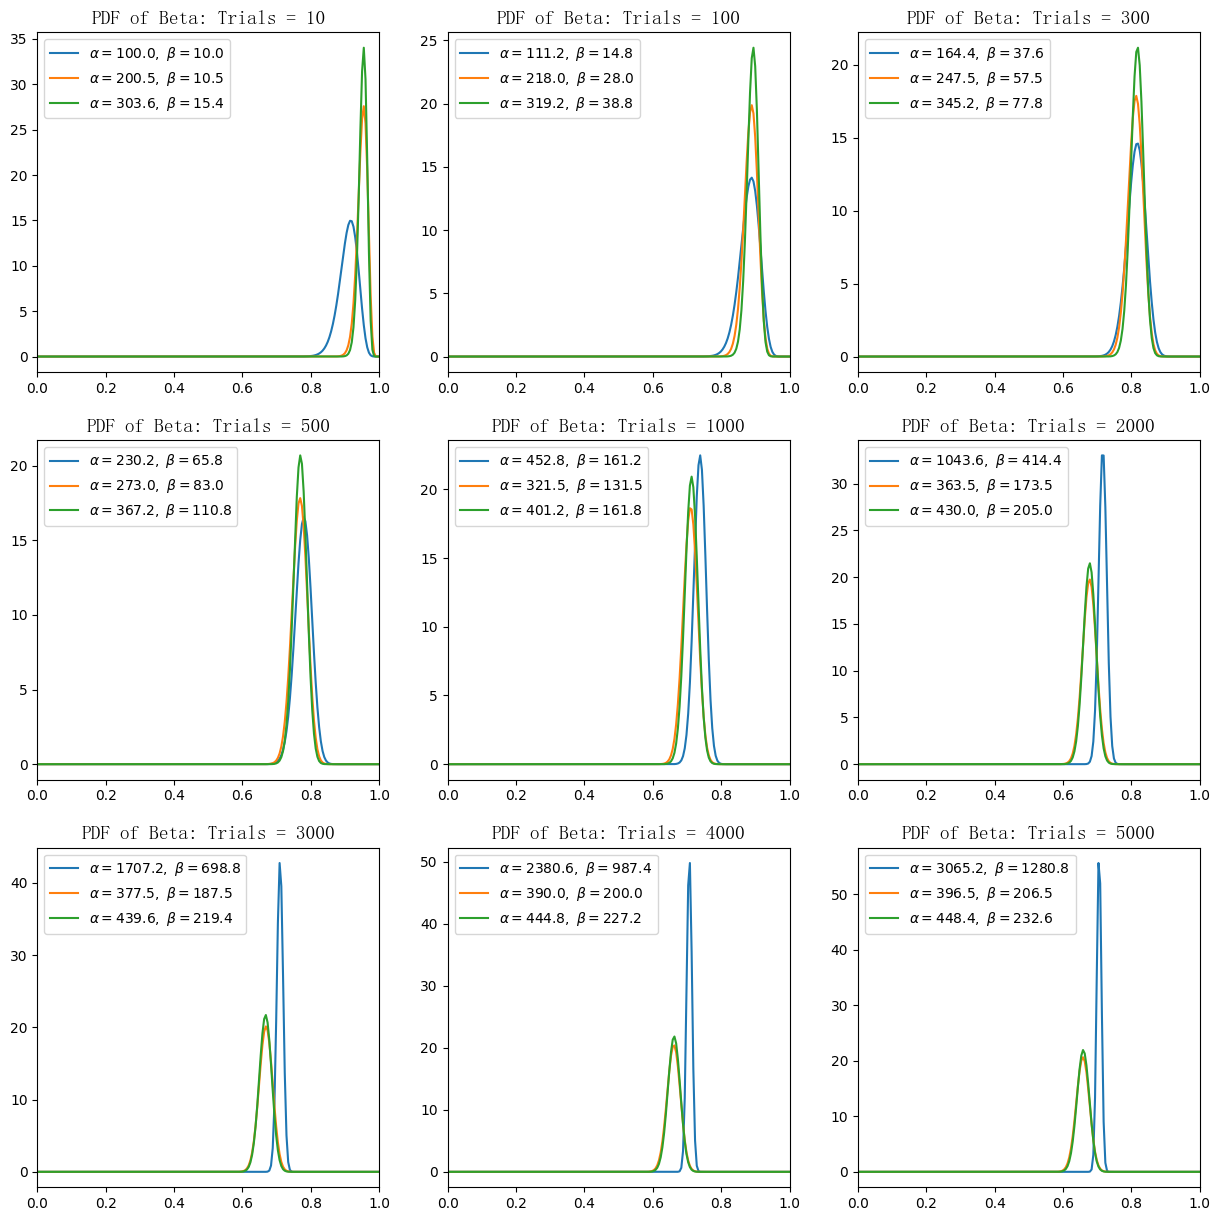

3305

In [27]:
N=5000
Beta_1=[[[10,10],[10,10],[10,10]],[[100,10],[200,10],[300,10]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF 
Thompson_PDF(sum_reward,1,Beta_1)

**Eg7:（α1,β1）=(10,10) (α2,β2)=(20,10) (α3,β3)=(30,10)**<br>

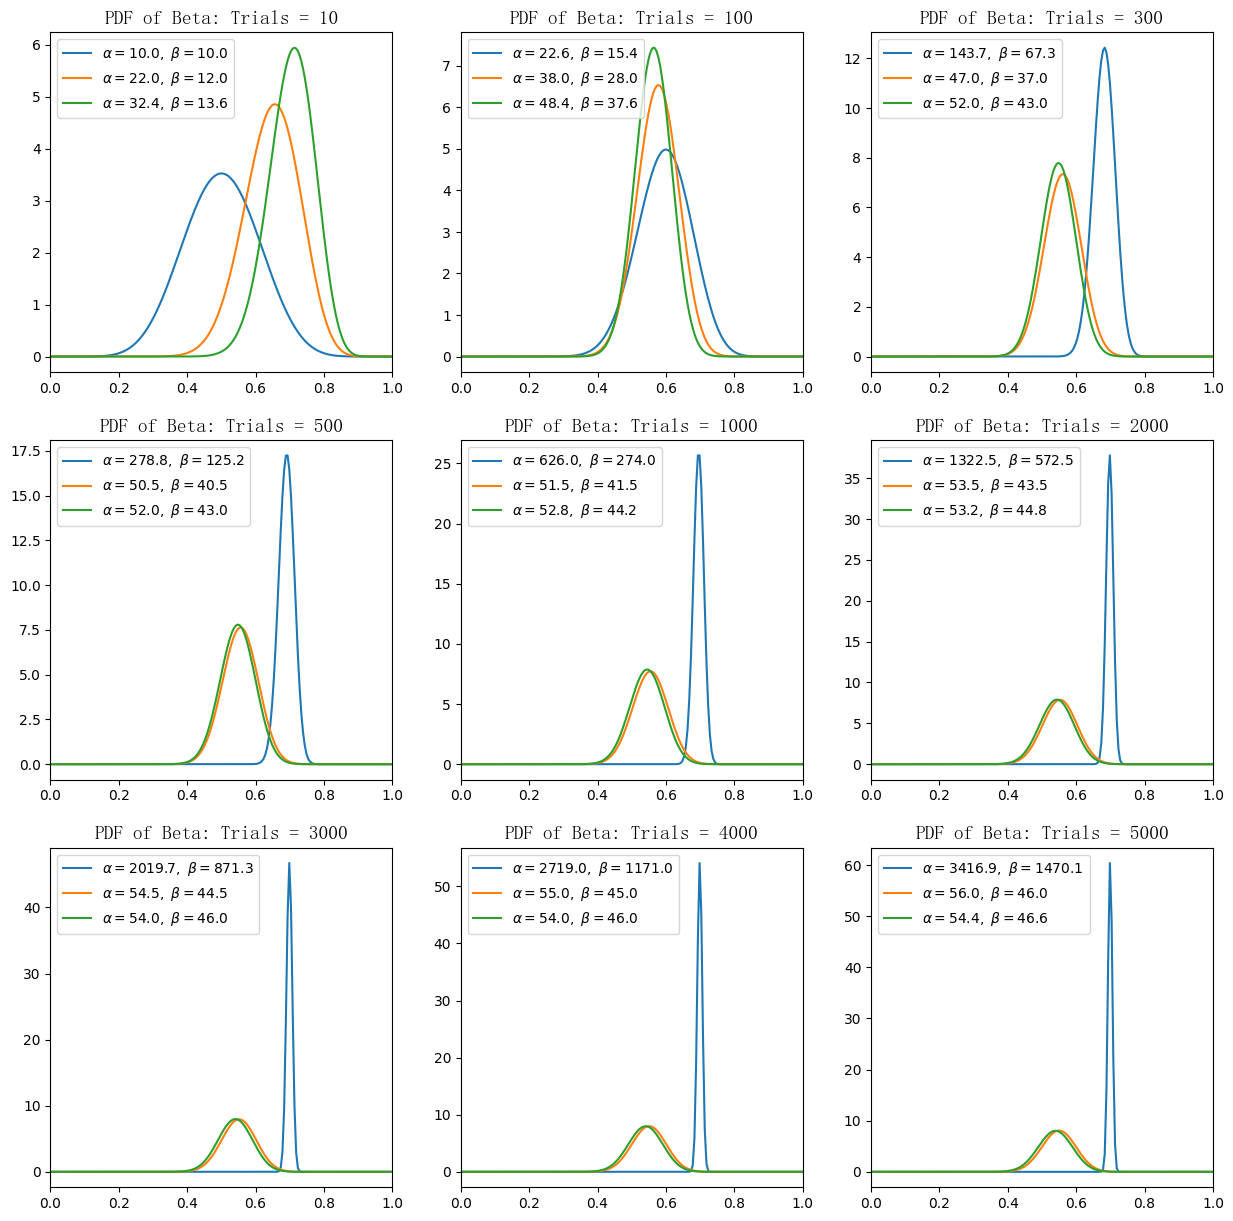

3530

In [28]:
N=5000
Beta_1=[[[10,10],[10,10],[10,10]],[[10,10],[20,10],[30,10]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF 
Thompson_PDF(sum_reward,1,Beta_1)

<font size="3">The Eg6 and Eg7 interpretes the situation when all the α>=β and β is fixed. We can see that if α is too big, the bandit can not distinguish between the prior distribution of each arm. So, it will spend a lot more time to explore the arm which is not the true optimal arm. However, if α is not too big, we can see from Eg7, the time spent on exploring other arms is less and we can find the optimal arm more quickly. </font>

**Eg8:（α1,β1）=(10,300) (α2,β2)=(10,200) (α3,β3)=(10,100)**<br>

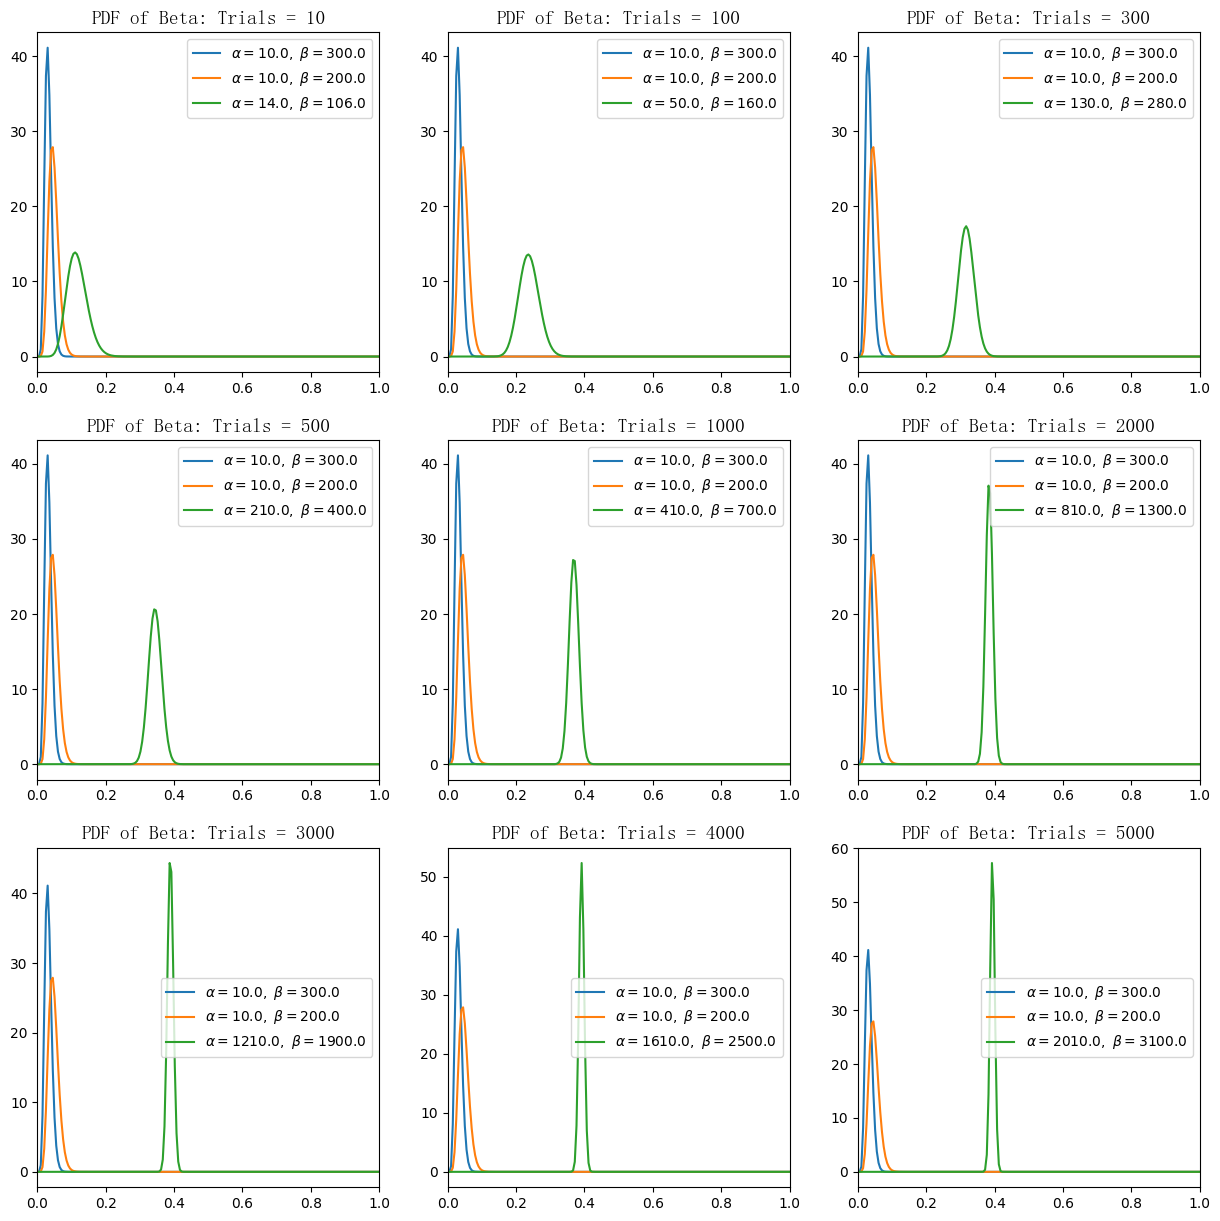

1989

In [29]:
N=5000
Beta_1=[[[10,10],[10,10],[10,10]],[[10,300],[10,200],[10,100]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF 
Thompson_PDF(sum_reward,1,Beta_1)

**Eg9:（α1,β1）=(10,30) (α2,β2)=(10,20) (α3,β3)=(10,10)**<br>

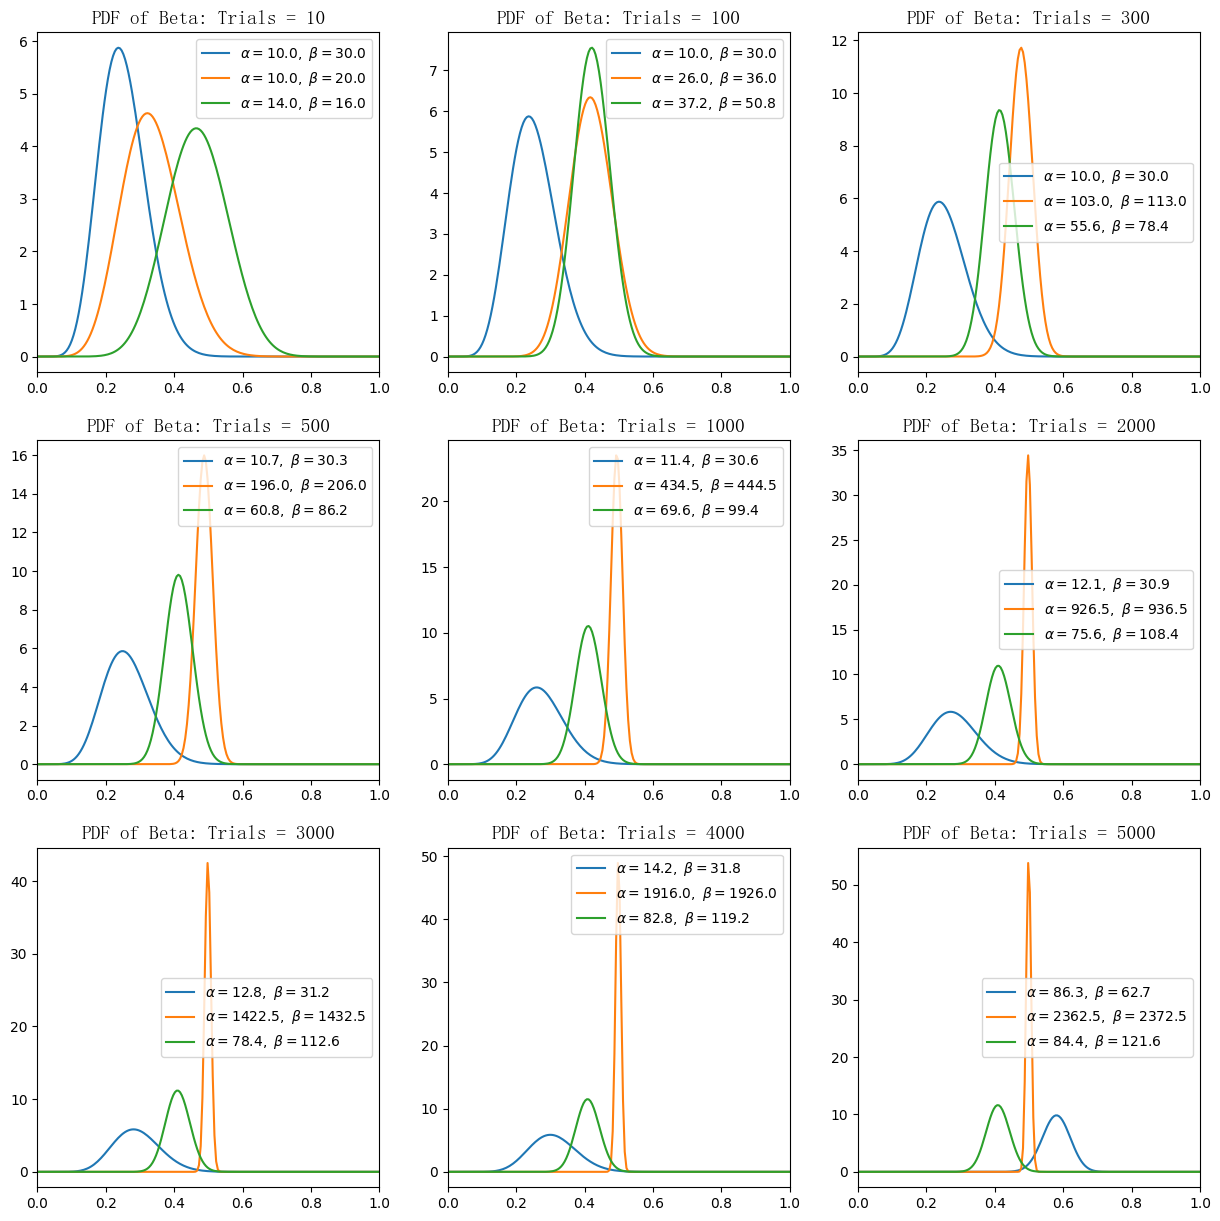

2489

In [30]:
N=5000
Beta_1=[[[10,10],[10,10],[10,10]],[[10,30],[10,20],[10,10]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF 
Thompson_PDF(sum_reward,1,Beta_1)

<font size="3">The Eg8 and Eg9 interpretes the situation when all the α<=β and α is fixed. We can see that if β is too big, the bandit can not distinguish between the prior distribution of each arm. So, it will spend a lot more time to explore the arm which is not the true optimal arm and may not get the optimal result at last. However, if β is not too big, we can see from Eg9, the time spent on exploring other arms is less and we can find the optimal arm more quickly and is more likely to find the optimal result. </font>

**Eg10:（α1,β1）=(1,10) (α2,β2)=(1,1) (α3,β3)=(1,1)**<br>

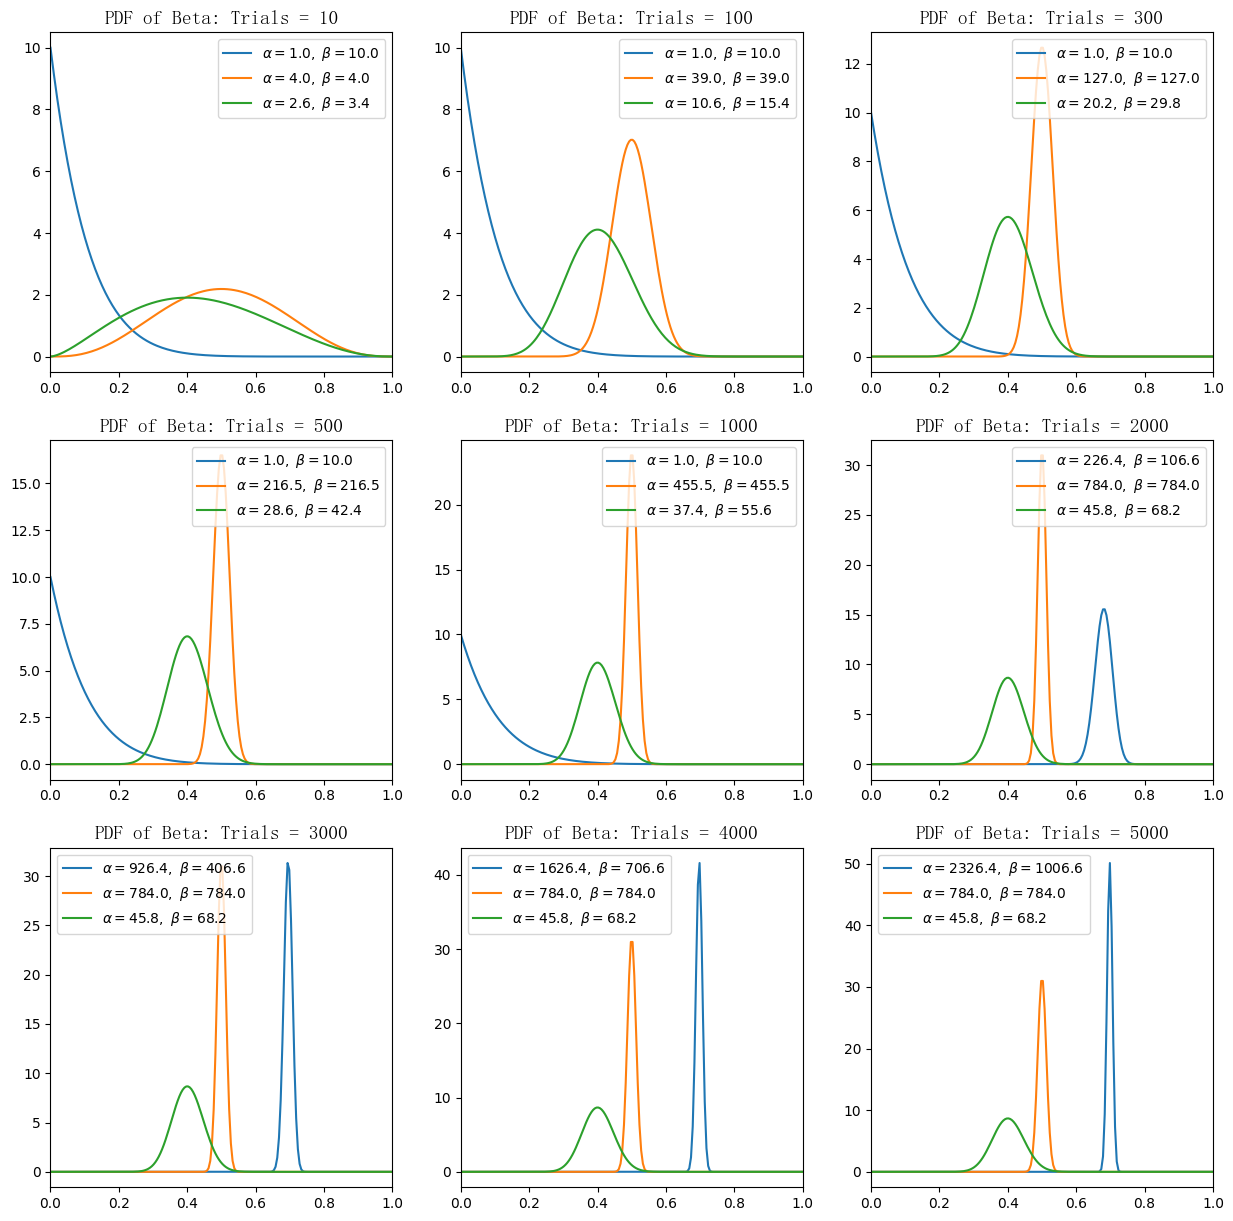

3120

In [31]:
N=5000
Beta_1=[[[10,10],[10,10],[10,10]],[[1,10],[1,1],[1,1]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF 
Thompson_PDF(sum_reward,1,Beta_1)

**Eg11:（α1,β1）=(10,1) (α2,β2)=(1,1) (α3,β3)=(1,1)**<br>

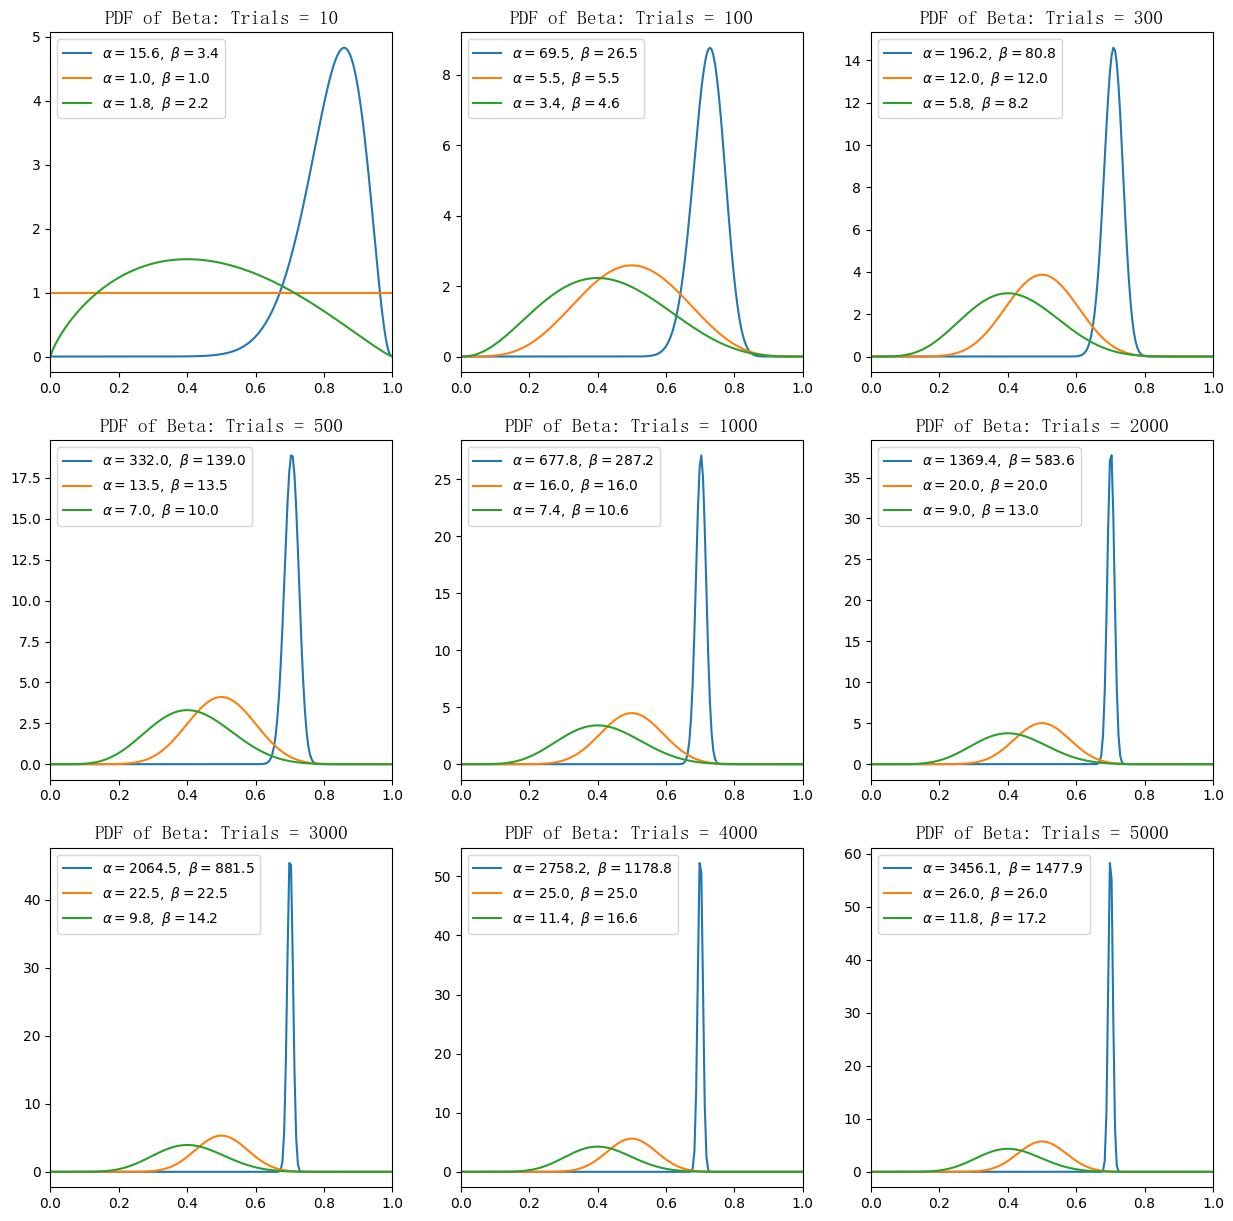

3490

In [32]:
N=5000
Beta_1=[[[10,10],[10,10],[10,10]],[[10,1],[1,1],[1,1]]]
count=[0,0,0]
prob=[0.7,0.5,0.4]
theta=[0,0,0]

sum_reward=0  #The goal is to maximize the sum_reward
ab_value=[]

# PDF 
Thompson_PDF(sum_reward,1,Beta_1)

<font size="3">Eg10 and Eg11 can tell us that if the setting value of the prior distribution of the real optimal arm is far different from the true probability of winning of this arm, the bandit will spend much time exploiting a less optimal arm and even may not find the optimal arm in the end. </font>

**Understanding of Tompson Sampling Algorithm**

<font size="3">

- Different from **UCB** and **Greedy** which is a deterministic algorithm, **Thompson sampling** is a probabilistic algorithm, which means the former are using the estimating strategy while the latter is using the sampling strategy.   
- In **UCB**, we need to update the theta at each round and we need to decide which arm to choose depended on this data. However, in **Thompson sampling**, it allows delayed feedback which means though we update the beta distribution of each arm at each round, we will still generate a sample from this distribution in the next round. So, it is not always deterministic, it allows kind of random in it.  
If the arm is selected many times,then $\alpha+\beta$ becomes large and the distribution of that arm becomes narrow. In other words, the reward of the arm has been determined. The random number generated by it is basically near the center of the distribution, close to the average reward of the distribution.  
If both the $\alpha+\beta$ and $\frac{\alpha}{\alpha+\beta}$ are large, it is a good arm with good average income. So it will be of your advantage to exploit it. Otherwise, if $\alpha+\beta$ is large and $\frac{\alpha}{\alpha+\beta}$ is small, it will be hard to generate a large random number from it since the range has become so narrow. Therefore, it will be hard for us to explore or exploit it anymore.  
If the $\alpha+\beta$ of the arm is very small and the distribution is very wide, that is, it is not given sufficient exploration times. At this time, it is impossible to determine whether it is good or bad, then the wider distribution may get a larger random number and gain times for us to explore it.

</font>

<font size="4">**Tradeoff in Tompson Sampling**</font>

<font size="3">

- The reason why **Tompson Sampling** performs better than **UCB and Greedy** if the parameter is appropriately chosen is that it is better to sample from a distribution that is close to the true distribution of optimal actions.
-  The closer the distribution is to the true distribution, the more likely it is that the sampled action will be optimal.
- Therefore since the expectation of beta distribution $E(X) = \frac{\alpha}{\alpha+\beta}$, as time passes by, if we see alpha as the number of success and beta as the number of failures, we can gain the approximately true probability of each arm and the PDF of each arm will converge to the their true distribution.
  </font>

<font size="4">

- **Conclusion**</font><br>
<font size="3">
1. **Exploration:**  For drawing the sample sometimes can cause random despite the fact that some expectations of the beta distribution is really high, so the bandit are exploring the true reward function.<br>
2. **Exploitation:** The larger the expectation of the beta distribution, the more likely the sample generated from it will be larger than the other ones. So, the bandit is also trying to maximizing its true reward.  <br>
3. **Tradeoff:** First, it can help to reduce the amount of exploration that is needed in order to find the optimal policy. Second, it can help to avoid local optimal, as the bandit is constantly re-evaluating the space of possible reward functions. </font>

**Regret Analysis of three Algorithms**

Define Stability: The bigger the variance is, the less the stability is.<br>
Define Accuracy: The smaller the mean is, the larger the accuracy is.

**Greedy**: <font size="3">The mean regret of Greedy Algorithm is around 87~753, while the variance is around 977~1557</font>

**UCB:** <font size="3">The mean regret of UCB Algorithm is around 90~273, while the variance is around 1218~1484</font>

**Tompson Sampling:**<font size="3"> The mean regret of Tompson Sampling Algorithm is around 1~3, while the variance is around 1087~1125</font>

<font size="3">Therefore, we can conclude that the sequence of **stability** is: <br>**Tompson Sampling** >  **UCB** > **Greedy** <br>if we just look at the largest variance the regret can reach.</font>

<font size="3">Therefore, we can conclude that the sequence of **accuracy** is: <br>**Tompson Sampling** >  **UCB** > **Greedy** <br>if we just look at the the period of mean with regard to the regret.</font>

<font size="3">In conclusion, since both **stability** and **accuracy** of **Tompson Sampling Algorithm** are the optimal, we can safely reach the conclusion that **Tompson Sampling Algorithm** has the best numerical results.</font>

## Dependent arms

<font size="3">To discuss the situation where the three arms are dependent, we can bring in a same
random variable to the originally fixed parameter $\theta_j$, which is the probability 
for the three arms to get a reward during each selection. 
That is to say, $\theta_j$
becomes $\theta_j(X)$, j = 1,2,3 for the three arms, X is a random variable $\in (0,1)$, and we 
don't know its distribution. We know for a fixed X = x, what is $\theta_j(x)$, and so that 
$\theta_1, \theta_2, \theta_3$ are dependent.

Thinking of Beta-Binomial conjucacy, with $\theta_j(x)$ as the bernoulli parameter, we can just 
set the unknown distribution of X to be the Beta distribution, that is $X\sim Beta(a,b)$. 

Now we want to know how the three arms are dependent, that is to determine the parameter x. Using the
results of trials done during the first several trials, we may get the confidence interval of x, where
the real parameter x lies in with high probability.

Then within the confidence interval, we select the relatively optimal arm. That is, we only 
select the arms that has the potential (has the biggest theta with parameter x in its confidence interval) 
to be the optimal arm. In these potential arms, we may use the UCB algorithm to determine which to choose.

For example, $\theta_1(x) = x, \theta_2(x) = x^{\frac{1}{2}}, \theta_3(x) = x^2$. And x = 0.81, 
so $\theta_1 = 0.81, \theta_2(x) = 0.9, \theta_3(x) = 0.6561$, which we don't know. Below is the pseudocode
of the algorithm.</font>

In [33]:
## Do not run the code below, it's pseudocode!

# what we don't know
theta = [0.81,0.9,0.6561]
# what we know
def theta_1(x):
    return x
def theta_2(x):
    return x**(1/2)
def theta_3(x):
    x**2

N = 5000 #time slots

#return the index (1,2,3) of the max ex_theta
def argmax(ex_theta):
    ans = 0
    return ans
#if it has a reward during this selection
def reward(j):
    rand = random.random()
    if rand > theta[j-1]:
        return 0
    return 1 
def cnt_max_arm(cnt):
    #return the arm that has been selected the most times
    return 

def Dependent_Bandit(c):
    ans = 0
    ex_theta = [0,0,0,0] #ex_thata[j] is the theta we keep computing during the selection
    cnt = [0,1,1,1] #cnt[j] is the selected time for arm j, j = 1,2,3

    ex_theta[1] = reward(1) #initialization
    ex_theta[2] = reward(2) #initialization
    ex_theta[3] = reward(3) #initialization

    for t in range(3,N+1):
        I = cnt_max_arm(cnt) #used to compute x_set
        x_set = [] # a set that contains the values of x that are in the confidence interval,
                   # where the interval can be computed by using I and the inequalities of 
                   # Non-asympototic Analysis in Lecture 9.
        j_set = [] # a set that contains the arms that probably has the max probability to get 
                   # reward, is the sub-set of {1,2,3}. The arms are selected using the value of
                   # x in x_set.
        # following are similar to UCB
        I_t = 0
        max_val = 0
        for j in range(0,3):
            if ex_theta[j]+c*math.sqrt(2*math.log(t)/count[j])>max_val:
                max_val = ex_theta[j]+c*math.sqrt(2*math.log(t)/count[j]) 
                I_t = j 
        cnt[I_t] += 1 
        ex_theta[I_t] += (reward(I_t) - ex_theta[I_t])/cnt[I_t] 
    
    return ans

# Part 2

# 1. Intuitive policy

In [34]:
gamma = 0.5
theta = [0.4,0.7]
N = 5000
def get_reward(j):
    rand = random.random()
    if rand > theta[j-1]:
        return 0
    return 1 


def Naive_Baysian(alpha_1,beta_1,alpha_2,beta_2):
    ans = 0
    a1 = alpha_1
    b1 = beta_1
    a2 = alpha_2
    b2 = beta_2
    for t in range(N):
        if a1/(a1+b1) > a2/(a2+b2):
            if get_reward(1):
                ans += gamma**(t)
                a1 += 1
            else:
                b1 += 1
        else:
            if get_reward(2):
                ans += gamma**(t)
                a2 += 1
            else:
                b2 += 1
    
    return ans


Text(0.5, 1.0, 'Bayesian (alpha_1,beta_1)=(701,301),(alpha_2,beta_2)=(1,701), mean = 0.7622483585454848')

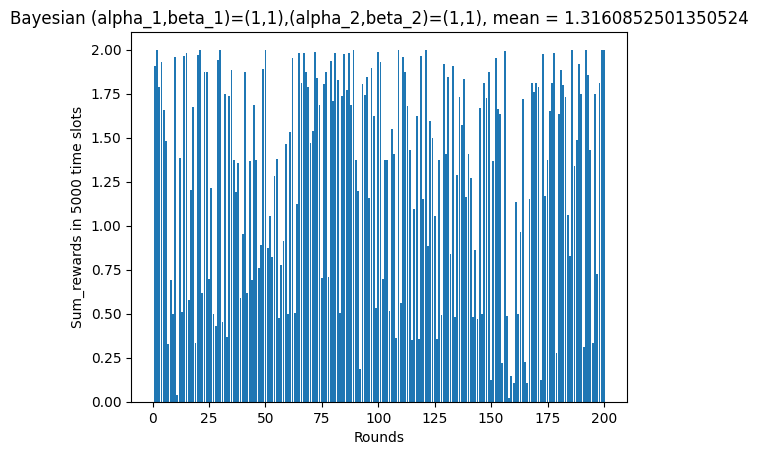

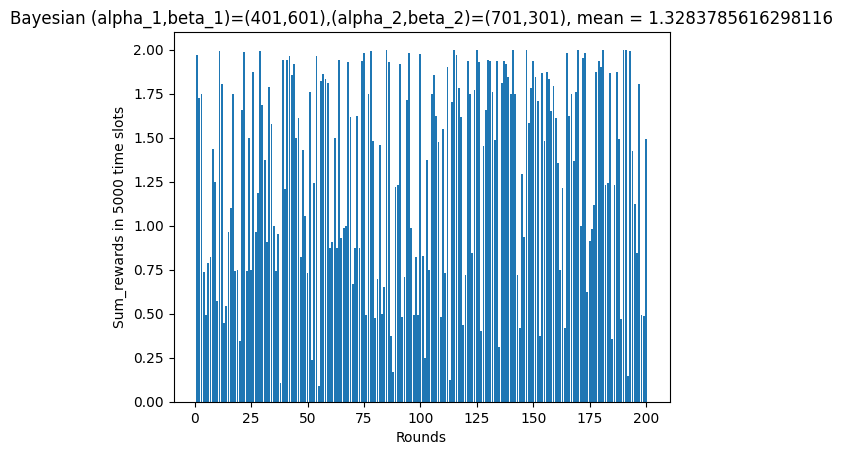

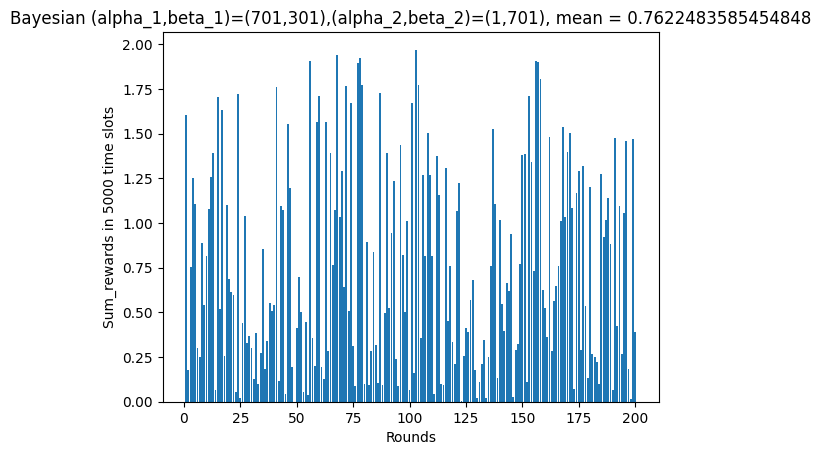

In [35]:
#experient begins
reward_1 = []
reward_2 = []
reward_3 = []
#average reward at each time slot
av_reward_1 = np.zeros(5000)
av_reward_2 = np.zeros(5000)
av_reward_3 = np.zeros(5000)

for i in range(M):
    reward_1.append(Naive_Baysian(1,1,1,1))
    reward_2.append(Naive_Baysian(401,601,701,301))
    reward_3.append(Naive_Baysian(701,301,1,701))
reward_1_mean = np.mean(reward_1)
reward_2_mean = np.mean(reward_2)
reward_3_mean = np.mean(reward_3)

#plot
x = np.arange(1,M+1,1)

plt.figure(1)
plt.bar(x,reward_1)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Bayesian (alpha_1,beta_1)=(1,1),(alpha_2,beta_2)=(1,1), mean = " + str(reward_1_mean))

plt.figure(2)
plt.bar(x,reward_2)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Bayesian (alpha_1,beta_1)=(401,601),(alpha_2,beta_2)=(701,301), mean = " + str(reward_2_mean))

plt.figure(3)
plt.bar(x,reward_3)
plt.xlabel("Rounds")
plt.ylabel("Sum_rewards in 5000 time slots")
plt.title("Bayesian (alpha_1,beta_1)=(701,301),(alpha_2,beta_2)=(1,701), mean = " + str(reward_3_mean))



# 2. The intuitive policy is not optimal

<font size="3">If the prior distribution, which is the origin parameter ($\alpha_1,\beta_1$) and ($\alpha_2,\beta_2$) are not so closed to the actual $\theta_1$ and $\theta_2$ of the two arms, we may be trapped in the bad selection instead of the optimal one.

For example, like the experiment above, the second group of parameter is very closed
to the actual $\theta_1$ and $\theta_2$, so it has a better result compared with the other two. While in the third group, we intentionally let the parameter to be the opposite of the real $\theta_1$ and $\theta_2$, so that it has an even worse result compared with the first group. </font>

# 3. Prove the recurence equation under an optimal policy

<font size="3">Define $R(\alpha_1,\beta_1,\alpha_2,\beta_2) = $ "the maximum total expected reward when the prior distribution of arm 1 is $Beta(\alpha_1,\beta_1)$ and arm 2 is $Beta(\alpha_2,\beta_2)$"</font>


<font size="3">Define $R_1(\alpha_1,\beta_1) = $"the expected maximum total reward if we choose arm 1 at the time when the prior distribution of arm 1 is $Beta(\alpha_1,\beta_1)$", which is the expectation of random variable $R_1$</font>

<font size="3">Define $R_2(\alpha_2,\beta_2) = $"the expected maximum total reward if we choose arm 2 at the time when the prior distribution of arm 2 is $Beta(\alpha_2,\beta_2)$",, which is the expectation of random variable $R_2$ </font>

<font size="3">According to the story of $Beta$ distribution, $\alpha$ is the prior number of success and $\beta$ is the prior number of failures. And according to $Beta-Binomial-conjugacy$, the posterior of $Beta$ distribution is still in the $Beta$ family. </font>

<font size="3">

- $R_1\left(\alpha_1, \beta_1\right)= \frac{\alpha_1}{\alpha_1+\beta_1}\left[1+\gamma R\left(\alpha_1+1, \beta_1, \alpha_2, \beta_2\right)\right]+\frac{\beta_1}{\alpha_1+\beta_1}\left[\gamma R\left(\alpha_1, \beta_1+1, \alpha_2, \beta_2\right)\right]$  
When the prior distribution of arm 1 is $Beta(\alpha_1,\beta_1)$, if we pull arm 1, the probability of a success is $E[\theta_1] = \frac{\alpha_1}{\alpha_1+\beta_1}$ and thus we will gain $reward = 1$ at this time slot. After that, we will begin with a new prior distribution with $\theta_1 \sim Beta(\alpha_1+1,\beta_1)$ and $\theta_2 \sim Beta(\alpha_2,\beta_2)$, which will recur the process in addition to a discount index = $\gamma$ on the new expected maximum total reward $R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$. Therefore, the total reward is $1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$ when the pull is a success. Besides, the probability of a failure is $1-E[\theta_1] = \frac{\beta_1}{\alpha_1+\beta_1}$ and thus we will gain no reward at this time slot. After that, we will begin with a new prior distribution with $\theta_1 \sim Beta(\alpha_1,\beta_1+1)$ and $\theta_2 \sim Beta(\alpha_2,\beta_2)$, which will recur the process in addition to a discount index = $\gamma$ on the new expected maximum total reward $R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$. Therefore, the total reward is $\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$ when the pull is a failure.</font>

<font size="3">

- $R_2\left(\alpha_2, \beta_2\right)= \frac{\alpha_2}{\alpha_2+\beta_2}\left[1+\gamma R\left(\alpha_1, \beta_1, \alpha_2+1, \beta_2\right)\right]  +\frac{\beta_2}{\alpha_2+\beta_2}\left[\gamma R\left(\alpha_1, \beta_1, \alpha_2, \beta_2+1\right)\right]$  
It can be explained similarly to $R_1(\alpha_1,\beta_1)$</font>

<font size="3">

- $R(\alpha_1, \beta_1, \alpha_2, \beta_2)= \max \{R_1(\alpha_1, \beta_1), R_2(\alpha_2, \beta_2)\}$, which means to choose the maximum reward between the maximum reward we gain if choosing arm 1 at the next time slot and if choosing arm 2 at the next time slot.</font>

<font size="3">

- $Base Case$:  
At time slot $t = 1$, the maximum expected total reward is choosing from pulling arm 1 at the first time slot and pulling arm 2 at the first time slot.    </font>

<font size="3">

$Conclusion$:  
We always calculate all the possible outcomes of total rewards starting from a fixed prior $Beta$ distribution and then select the maximum one at each time slot. Therefore, we can get the optimal result at last.    </font>

# 4. Solve the equation exactly or approximately

<font size="3">We can observe from the recursion that the sum of four parameters on the right side will be 1 greater than the left side. Therefore, if we can know the approximation for all the combinations of the four parameters based on $\alpha_1+\beta_1+\alpha_2+\beta_2 = N$. We can approximate the value of R with $\alpha_1+\beta_1+\alpha_2+\beta_2 = N-1$ according to the recursion where we need to compute $(N-2)(N-3)(N-4)/3!$ times, for there are such number of combinations for the four parameters. After that, we can recursively computer for all the R based on $\alpha_1+\beta_1+\alpha_2+\beta_2 = n$, where $n \in [4,N-1]$</font>

# 5. Optimal Policy

<font size="6">**Idea**:</font>  

<font size="3"> 

- **Aim**: According to the problem, we want to maximize the total expected reward which is    
</font>


![image.png](./1.png)

<font size="3">,where $\pi$ means the policy the player chooses in each time slot, j is the index of two arms, $\gamma \in (0,1)$ means discount which indicates the reward gained in each time slot will decrease with respect to such a rate, $R_j(x_j(t))$ means the original reward gained in time slot t which can only be 0 or 1 in this problem due to **Bernoulli process**, $x_j(0)$ means the initial state of arm j at time slot 0 and it also means we choose arm j in the first time.</font>

<font size="3">

- **State**: We define $({\alpha_t}^{j},{\beta_t}^{j})$. And $x_j(t)$ means the state of arm j in the time slot t. And the transformation of each arm forms a Markov chain respectively, which means the next state only depends on the previous state.  
- **Prevailing charge**: Although this multi-bandit problem does not mention that the cost that the player pays each time he pulls an arm, we will introduce a charge $c$ to illustrate the cost in order to help find the optimal policy. At each time slot, the player may want know whether he will gain a positive reward with the prevailing cost from this time slot to the infinite time slot.  
We can judge whether:

![image.png](./2.png)

If this inequality establishes, the player can continue playing the game. Otherwise, the player will quit.  
- **Fair charge (Gittins Index)**: If we treat $c$ as a constant (that is "state-independent"), which means the value of $c$ will not change with time passing by. And since our time slot is infinite, and if $c$ is really small, then the player can play this game "forever". However, the casino will prevent it from happening, so it increases the value of $c$ as time passing by (that is "state-dependent"). In order to maximize the profit of the player, we should compare the value between $c_t$ and total reward gained from the time slot $t$ to the infinite. And it is obvious that the player will always reach a stopping point where he must stop in order not to lose money. Therefore, we define this stopping time slot as $\tau$ and corresponding $c_{\tau}$ as:  

![image.png](./3.png)

The "sup" inside means, given a $c$, the player will always find the policy to gain the total maximum value, while the "sup" outside means finding the maximum $c$ to make total profit maximum.  

  - If $\gamma_{{x_j}^t} \geq \gamma_{{x_j}^{t-1}}$, the player will continue.
  - If $\gamma_{{x_j}^t} \leq \gamma_{{x_j}^{t-1}}$ and $c_{t-1}$ stays the same or increases, the player will quit.  
  
- **Optimal Policy**: We called $\gamma_{{x_j}^t}$ as the "Gittins Index", and at each time slot the player should choose the arm with the largest "Gittins Index" to ensure the maximum total reward.</font>

<font size="6">**Computation**</font>:  

<font size="3"> 

1. We define *Gittins Index* = 

![image.png](./4.png)

And we need to compute the *Gittins Index* for arm 1 and arm 2 in every time slot and choose the largest to pull.  
2. Computing the correspnding stopping time for the current state $x_j(t)$ of bandit process for arm 1 and arm 2.
</font>